In [ ]:
 import requests
from bs4 import BeautifulSoup
import pandas as pd

#**API 1: News API**

In [ ]:
def fetch_news_articles(keyword, api_key, max_results=200):
    page_size = 100
    total_pages = (max_results + page_size - 1) // page_size
    data = []

    for page in range(1, total_pages + 1):
        url = f"https://newsapi.org/v2/everything?q={keyword}&pageSize={page_size}&page={page}&apiKey={api_key}"
        response = requests.get(url)
        if response.status_code == 200:
            articles = response.json().get('articles', [])
            for article in articles:
                data.append({
                    "title": article.get('title'),
                    "url": article.get('url'),
                    "excerpt": article.get('description') or article.get('title'),
                    "topic_label": None,
                    "view_label": None,
                    "query": keyword
                })
            if len(articles) < page_size:
                break
        else:
            print(f"Error: {response.status_code}, {response.text}")
            break
    return data

def assign_labels(data, keyword_mapping):

    for entry in data:
        keyword = entry["query"]
        if keyword in keyword_mapping:
            entry["view_label"], entry["topic_label"] = keyword_mapping[keyword]
    return data

if __name__ == "__main__":
    api_key = "1b79bc16a8f4"

    keyword_mapping = {
        # Online Working
        "Flexible work": ("Online Working", "Work Trends"),
        "Blended work model": ("Online Working", "Work Trends"),
        "Mixed work environment": ("Online Working", "Work Trends"),
        "Part-time remote work": ("Online Working", "Work Trends"),
        "Office-remote split": ("Online Working", "Technology & Jobs"),
        "Hybrid jobs": ("Online Working", "Technology & Jobs"),
        "Flexible workplace": ("Online Working", "Work Culture"),
        "Adaptive work model": ("Online Working", "Economy"),
        "Remote work": ("Online Working", "Work Trends"),
        "Digital nomad": ("Online Working", "Work Culture"),
        "Work from anywhere": ("Online Working", "Work Culture"),
        "Online job opportunities": ("Online Working", "Economy"),
        "Remote employment": ("Online Working", "Work Trends"),
        "Virtual teams": ("Online Working", "Work Culture"),
        "Distributed workforce": ("Online Working", "Technology & Jobs"),
        "Freelance marketplaces": ("Online Working", "Economy"),
        "Telecommuting": ("Online Working", "Work Trends"),
        "Remote team management": ("Online Working", "Work Culture"),
        "Remote collaboration": ("Online Working", "Technology & Jobs"),
        "Online workforce": ("Online Working", "Economy"),

        # Offline Working
        "Independent contractor": ("Offline Working", "Work Trends"),
        "Self-employment": ("Offline Working", "Work Trends"),
        "Gig economy": ("Offline Working", "Technology & Jobs"),
        "Freelance jobs": ("Offline Working", "Technology & Jobs"),
        "Freelance contracts": ("Offline Working", "Economy"),
        "Traditional office work": ("Offline Working", "Work Trends"),
        "Corporate workplace": ("Offline Working", "Work Culture"),
        "Full-time office jobs": ("Offline Working", "Work Culture"),
        "Physical workplace": ("Offline Working", "Economy"),
        "On-site employment": ("Offline Working", "Technology & Jobs"),
        "Workplace collaboration": ("Offline Working", "Work Culture"),
        "In-person meetings": ("Offline Working", "Work Trends"),
        "Company culture": ("Offline Working", "Work Culture"),
        "Office productivity": ("Offline Working", "Technology & Jobs"),
        "Traditional workforce": ("Offline Working", "Economy"),
        "Corporate team building": ("Offline Working", "Work Culture"),
        "Workplace efficiency": ("Offline Working", "Technology & Jobs"),
        "Brick-and-mortar businesses": ("Offline Working", "Economy"),
        "Office-based roles": ("Offline Working", "Work Trends")
    }
    all_articles = []
    for keyword in keyword_mapping.keys():
        print(f"Fetching articles for: {keyword}")
        articles = fetch_news_articles(keyword, api_key, max_results=200)
        all_articles.extend(articles)

    all_articles = assign_labels(all_articles, keyword_mapping)
    final_dataset = pd.DataFrame(all_articles)
    final_dataset = final_dataset.drop_duplicates(subset=["title", "url"], keep="first")

    print(final_dataset.head())
    final_dataset.to_csv("news_articles_labeled.csv", index=False)
    print("Dataset saved to 'news_articles_labeled.csv'")


Fetching articles for: Flexible work
Fetching articles for: Blended work model
Fetching articles for: Mixed work environment
Fetching articles for: Part-time remote work
Error: 426, {"status":"error","code":"maximumResultsReached","message":"You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 200. Please upgrade to a paid plan if you need more results."}
Fetching articles for: Office-remote split
Fetching articles for: Hybrid jobs
Fetching articles for: Flexible workplace
Fetching articles for: Adaptive work model
Fetching articles for: Remote work
Error: 426, {"status":"error","code":"maximumResultsReached","message":"You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 200. Please upgrade to a paid plan if you need more results."}
Fetching articles for: Digital nomad
Fetching articles for: Work from anywhere
Error: 426, {"s

In [ ]:
all_articles

[{'title': "Working from home 'not proper work' - ex-Asda boss",
  'url': 'https://www.bbc.com/news/articles/c0qww8xdvnwo',
  'excerpt': 'Lord Rose says it harms productivity but expert says hybrid work can be as good as full-time in the office.',
  'topic_label': 'Work Trends',
  'view_label': 'Online Working',
  'query': 'Flexible work'},
 {'title': "New Zealand relaxes 'golden visa' rules in bid to attract wealthy investors amid struggling economy",
  'url': 'https://www.businessinsider.com/new-zealand-golden-visa-investor-rules-attract-wealthy-2025-2',
  'excerpt': 'The investor visa is set to become "simpler and more flexible," New Zealand\'s Immigration Minister Erica Stanford said.',
  'topic_label': 'Work Trends',
  'view_label': 'Online Working',
  'query': 'Flexible work'},
 {'title': 'Peloton star Cody Rigbsy shares his high-protein diet strategy to build muscle and age well in his late 30s',
  'url': 'https://www.businessinsider.com/peloton-cody-rigsby-high-protein-diet-str

In [ ]:
final_dataset.nunique()

title          2669
url            2692
excerpt        2661
topic_label       4
view_label        2
query            39
dtype: int64

#**API 2: Media Stack**

In [ ]:
def fetch_mediastack_articles(keyword, api_key, limit=100):

    base_url = "http://api.mediastack.com/v1/news"
    params = {
        "access_key": api_key,
        "keywords": keyword,
        "languages": "en",
        "categories": "business",
        "limit": limit
    }
    response = requests.get(base_url, params=params)
    articles = []

    if response.status_code == 200:
        data = response.json()
        for article in data.get("data", []):
            articles.append({
                "title": article.get("title"),
                "url": article.get("url"),
                "excerpt": article.get("description") or article.get("title"),
                "topic_label": None,
                "view_label": None,
                "query": keyword
            })
    else:
        print(f"Error: {response.status_code}, {response.text}")
    return articles

def assign_labels(data, keyword_mapping):

    for entry in data:
        keyword = entry["query"]
        if keyword in keyword_mapping:
            entry["view_label"], entry["topic_label"] = keyword_mapping[keyword]
    return data

if __name__ == "__main__":
    api_key = "72075efa615f681442cbcfa830a4a127"
    keyword_mapping = {
        # Online Working
        "Flexible work": ("Online Working", "Work Trends"),
        "Blended work model": ("Online Working", "Work Trends"),
        "Mixed work environment": ("Online Working", "Work Trends"),
        "Part-time remote work": ("Online Working", "Work Trends"),
        "Office-remote split": ("Online Working", "Technology & Jobs"),
        "Hybrid jobs": ("Online Working", "Technology & Jobs"),
        "Flexible workplace": ("Online Working", "Work Culture"),
        "Adaptive work model": ("Online Working", "Economy"),
        "Remote work": ("Online Working", "Work Trends"),
        "Digital nomad": ("Online Working", "Work Culture"),
        "Work from anywhere": ("Online Working", "Work Culture"),
        "Online job opportunities": ("Online Working", "Economy"),
        "Remote employment": ("Online Working", "Work Trends"),
        "Virtual teams": ("Online Working", "Work Culture"),
        "Distributed workforce": ("Online Working", "Technology & Jobs"),
        "Freelance marketplaces": ("Online Working", "Economy"),
        "Telecommuting": ("Online Working", "Work Trends"),
        "Remote team management": ("Online Working", "Work Culture"),
        "Remote collaboration": ("Online Working", "Technology & Jobs"),
        "Online workforce": ("Online Working", "Economy"),

        # Offline Working
        "Independent contractor": ("Offline Working", "Work Trends"),
        "Self-employment": ("Offline Working", "Work Trends"),
        "Gig economy": ("Offline Working", "Technology & Jobs"),
        "Freelance jobs": ("Offline Working", "Technology & Jobs"),
        "Freelance contracts": ("Offline Working", "Economy"),
        "Traditional office work": ("Offline Working", "Work Trends"),
        "Corporate workplace": ("Offline Working", "Work Culture"),
        "Full-time office jobs": ("Offline Working", "Work Culture"),
        "Physical workplace": ("Offline Working", "Economy"),
        "On-site employment": ("Offline Working", "Technology & Jobs"),
        "Workplace collaboration": ("Offline Working", "Work Culture"),
        "In-person meetings": ("Offline Working", "Work Trends"),
        "Company culture": ("Offline Working", "Work Culture"),
        "Office productivity": ("Offline Working", "Technology & Jobs"),
        "Traditional workforce": ("Offline Working", "Economy"),
        "Corporate team building": ("Offline Working", "Work Culture"),
        "Workplace efficiency": ("Offline Working", "Technology & Jobs"),
        "Brick-and-mortar businesses": ("Offline Working", "Economy"),
        "Office-based roles": ("Offline Working", "Work Trends")
    }
    all_articles = []

    for keyword in keyword_mapping.keys():
        print(f"Fetching articles for: {keyword}")
        articles = fetch_mediastack_articles(keyword, api_key, limit=100)
        all_articles.extend(articles)

    all_articles = assign_labels(all_articles, keyword_mapping)
    final_dataset = pd.DataFrame(all_articles)
    final_dataset = final_dataset.drop_duplicates(subset=["title", "url"], keep="first")

    print(final_dataset.head())
    final_dataset.to_csv("mediastack_articles_labeled.csv", index=False)
    print("Dataset saved to 'mediastack_articles_labeled.csv'")

Fetching articles for: Flexible work
Fetching articles for: Blended work model
Fetching articles for: Mixed work environment
Fetching articles for: Part-time remote work
Fetching articles for: Office-remote split
Fetching articles for: Hybrid jobs
Fetching articles for: Flexible workplace
Fetching articles for: Adaptive work model
Fetching articles for: Remote work
Fetching articles for: Digital nomad
Fetching articles for: Work from anywhere
Fetching articles for: Online job opportunities
Fetching articles for: Remote employment
Fetching articles for: Virtual teams
Fetching articles for: Distributed workforce
Fetching articles for: Freelance marketplaces
Fetching articles for: Telecommuting
Fetching articles for: Remote team management
Fetching articles for: Remote collaboration
Fetching articles for: Online workforce
Fetching articles for: Independent contractor
Fetching articles for: Self-employment
Fetching articles for: Gig economy
Fetching articles for: Freelance jobs
Error: 429,

In [ ]:
all_articles

[{'title': 'The Future of Remote Work: How Businesses Can Stay Secure and Productive',
  'url': 'https://www.abcmoney.co.uk/2025/02/the-future-of-remote-work-how-businesses-can-stay-secure-and-productive/',
  'excerpt': 'Remote work has become an integral part of the modern business landscape. Companies worldwide are embracing flexible work environments, allowing employees to work from anywhere. While this shift has increased productivity and work-life balance, it has also introduced significant security challenges. Businesses must prioritize cybersecurity measures to protect sensitive data, ensure smooth operations, and maintain [&#8230;]The post The Future of Remote Work: How Businesses Can Stay Secure and Productive appeared first on ABC Money.',
  'topic_label': 'Work Trends',
  'view_label': 'Online Working',
  'query': 'Flexible work'},
 {'title': 'Young workers twice as likely to take mental health leave as new UK research reveals scale of crisis',
  'url': 'https://bmmagazine.c

In [ ]:
final_dataset.shape

(134, 6)

#**Combining the data obtained from api calls**

In [ ]:
import pandas as pd

mediastack_df = pd.read_csv("mediastack_articles_labeled.csv")
newsapi_df = pd.read_csv("news_articles_labeled.csv")  # Ensure this file is available
combined_df = pd.concat([mediastack_df, newsapi_df], ignore_index=True)
combined_df = combined_df.drop_duplicates(subset=["title", "url"], keep="first")
combined_df.to_csv("combined_articles.csv", index=False)
print("Dataset saved to 'combined_articles.csv'")


Dataset saved to 'combined_articles.csv'


In [ ]:
article_data = pd.read_csv("combined_articles.csv")

In [ ]:
article_data.shape

(2825, 6)

##**Web Scrapping**

In [ ]:
pip install feedparser pandas


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.9 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=7c71f8b9dc887018c643495668da29a5def9d015457ac3d18d38466391a72ff6
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [ ]:
import feedparser
import pandas as pd

rss_url = "https://news.google.com/rss/search?q=remote+work+vs+office+work&hl=en-US&gl=US&ceid=US:en"
feed = feedparser.parse(rss_url)

news_data = []
for entry in feed.entries:
    title = entry.title
    link = entry.link
    published = entry.published
    source = entry.source.title if 'source' in entry else "Unknown Source"

    news_data.append({"Title": title, "Link": link, "Published": published, "Source": source})

df = pd.DataFrame(news_data)

In [ ]:
news_data

In [ ]:
df

Title  \
0   Is your boss wrong about remote work? - CyberN...   
1   Several agencies end telework, remote work agr...   
2   Returning to the office? Focus more on practic...   
3   Blast from the Past: The Potential Ripple Effe...   
4   Exclusive: JPMorgan CEO Dimon derides in-offic...   
..                                                ...   
95  Hybrid work is not the future, says Meta’s for...   
96  Elon Musk, Vivek Ramaswamy call remote work a ...   
97  Most CEOs expect full return to office in 3 ye...   
98  These 20 Companies Are Sticking With Remote-Wo...   
99  Are remote workers really working all day? Her...   

                                                 Link  \
0   https://news.google.com/rss/articles/CBMihwFBV...   
1   https://news.google.com/rss/articles/CBMizgFBV...   
2   https://news.google.com/rss/articles/CBMi8AFBV...   
3   https://news.google.com/rss/articles/CBMirwFBV...   
4   https://news.google.com/rss/articles/CBMivwFBV...   
..                                                ...   
95  https://news.google.com/rss/articles/CBMifkFVX...   
96  https://news.google.com/rss/articles/CBMi9AFBV...   
97  https://news.google.com/rss/articles/CBMimgFBV...   
98  https://news.google.com/rss/articles/CBMiqAFBV...   
99  https://news.google.com/rss/articles/CBMikwFBV...   

                        Published                   Source  
0   Sun, 16 Feb 2025 16:00:40 GMT            CyberNews.com  
1   Wed, 12 Feb 2025 21:42:02 GMT     Federal News Network  
2   Fri, 14 Feb 2025 00:00:00 GMT                 McKinsey  
3   Wed, 12 Feb 2025 14:49:41 GMT  The National Law Review  
4   Thu, 13 Feb 2025 17:42:33 GMT              Reuters.com  
..                            ...                      ...  
95  Tue, 24 Sep 2024 07:00:00 GMT            Yahoo Finance  
96  Thu, 02 Jan 2025 08:00:00 GMT           NBC Washington  
97  Mon, 23 Sep 2024 07:00:00 GMT                  HR Dive  
98  Fri, 17 Jan 2025 08:00:00 GMT         Money Talks News  
99  Wed, 18 Sep 2024 07:00:00 GMT                USA TODAY  

[100 rows x 4 columns]

In [ ]:
import feedparser
import pandas as pd

rss_url = "https://news.google.com/rss/search?q=remote+work+vs+office+work&hl=en-US&gl=US&ceid=US:en"
feed = feedparser.parse(rss_url)

news_data = []
for entry in feed.entries:
    title = entry.title
    link = entry.link
    published = entry.published
    source = entry.source.title if 'source' in entry else "Unknown Source"
    description = entry.summary if 'summary' in entry else "No description available"

    news_data.append({
        "Title": title,
        "Link": link,
        "Published": published,
        "Source": source,
        "Description": description
    })

df = pd.DataFrame(news_data)
df = df.drop_duplicates(subset=["Title", "Link"], keep="first")


In [ ]:
df

Title  \
0   Is your boss wrong about remote work? - CyberN...   
1   Exclusive: JPMorgan CEO Dimon derides in-offic...   
2   Several agencies end telework, remote work agr...   
3   Returning to the office? Focus more on practic...   
4   Blast from the Past: The Potential Ripple Effe...   
..                                                ...   
95  Elon Musk, Vivek Ramaswamy call remote work a ...   
96  Concerns raised over Ohio’s back-to-office ord...   
97  Military spouses want clarity on return-to-off...   
98  DeWine is forcing workers back into the office...   
99  Zoom interruptions...good? | Remote work stren...   

                                                 Link  \
0   https://news.google.com/rss/articles/CBMihwFBV...   
1   https://news.google.com/rss/articles/CBMivwFBV...   
2   https://news.google.com/rss/articles/CBMizgFBV...   
3   https://news.google.com/rss/articles/CBMi8AFBV...   
4   https://news.google.com/rss/articles/CBMirwFBV...   
..                                                ...   
95  https://news.google.com/rss/articles/CBMi9AFBV...   
96  https://news.google.com/rss/articles/CBMiswFBV...   
97  https://news.google.com/rss/articles/CBMirgFBV...   
98  https://news.google.com/rss/articles/CBMiuwFBV...   
99  https://news.google.com/rss/articles/CBMixAFBV...   

                        Published                   Source  \
0   Sun, 16 Feb 2025 16:00:40 GMT            CyberNews.com   
1   Thu, 13 Feb 2025 17:42:33 GMT                  Reuters   
2   Wed, 12 Feb 2025 21:42:02 GMT     Federal News Network   
3   Fri, 14 Feb 2025 00:00:00 GMT                 McKinsey   
4   Wed, 12 Feb 2025 14:49:41 GMT  The National Law Review   
..                            ...                      ...   
95  Thu, 02 Jan 2025 08:00:00 GMT           NBC Washington   
96  Tue, 11 Feb 2025 18:00:56 GMT                NewsBreak   
97  Fri, 07 Feb 2025 08:00:00 GMT     Federal News Network   
98  Thu, 06 Feb 2025 08:00:00 GMT    The Columbus Dispatch   
99  Fri, 15 Nov 2024 08:00:00 GMT             HR Grapevine   

                                          Description  
0   <a href="https://news.google.com/rss/articles/...  
1   <a href="https://news.google.com/rss/articles/...  
2   <a href="https://news.google.com/rss/articles/...  
3   <a href="https://news.google.com/rss/articles/...  
4   <a href="https://news.google.com/rss/articles/...  
..                                                ...  
95  <a href="https://news.google.com/rss/articles/...  
96  <a href="https://news.google.com/rss/articles/...  
97  <a href="https://news.google.com/rss/articles/...  
98  <a href="https://news.google.com/rss/articles/...  
99  <a href="https://news.google.com/rss/articles/...  

[100 rows x 5 columns]

In [ ]:
import feedparser
import pandas as pd

queries = [
    "remote+work+vs+office+work",
    "hybrid+work+productivity",
    "future+of+remote+work",
    "return+to+office+trend",
    "work+from+home+vs+onsite"
]

base_url = "https://news.google.com/rss/search?q={}&hl=en-US&gl=US&ceid=US:en"

news_data = []
for query in queries:
    rss_url = base_url.format(query)
    feed = feedparser.parse(rss_url)

    for entry in feed.entries:
        title = entry.title
        link = entry.link
        published = entry.published
        source = entry.source.title if 'source' in entry else "Unknown Source"
        description = entry.summary if 'summary' in entry else "No description available"

        news_data.append({
            "Title": title,
            "Link": link,
            "Published": published,
            "Source": source,
            "Description": description
        })

df = pd.DataFrame(news_data)
df = df.drop_duplicates(subset=["Title", "Link"], keep="first")

In [ ]:
df

Title  \
0    Is your boss wrong about remote work? - CyberN...   
1    Exclusive: JPMorgan CEO Dimon derides in-offic...   
2    Several agencies end telework, remote work agr...   
3    Returning to the office? Focus more on practic...   
4    Blast from the Past: The Potential Ripple Effe...   
..                                                 ...   
467     New definition of "External Users" - Microsoft   
468  Telework, time use, and well-being: Evidence f...   
469                 HeartStart AED Solutions - Philips   
470  Work from home not going anywhere in South Afr...   
471  Guidance to support regularising ad hoc home a...   

                                                  Link  \
0    https://news.google.com/rss/articles/CBMihwFBV...   
1    https://news.google.com/rss/articles/CBMivwFBV...   
2    https://news.google.com/rss/articles/CBMizgFBV...   
3    https://news.google.com/rss/articles/CBMi8AFBV...   
4    https://news.google.com/rss/articles/CBMirwFBV...   
..                                                 ...   
467  https://news.google.com/rss/articles/CBMiggFBV...   
468  https://news.google.com/rss/articles/CBMid0FVX...   
469  https://news.google.com/rss/articles/CBMisAFBV...   
470  https://news.google.com/rss/articles/CBMinwFBV...   
471  https://news.google.com/rss/articles/CBMitwFBV...   

                         Published                   Source  \
0    Sun, 16 Feb 2025 16:00:40 GMT            CyberNews.com   
1    Thu, 13 Feb 2025 17:42:33 GMT                  Reuters   
2    Wed, 12 Feb 2025 21:42:02 GMT     Federal News Network   
3    Fri, 14 Feb 2025 00:00:00 GMT                 McKinsey   
4    Wed, 12 Feb 2025 14:49:41 GMT  The National Law Review   
..                             ...                      ...   
467  Tue, 25 Jun 2024 07:00:00 GMT                Microsoft   
468  Wed, 05 Jun 2024 07:00:00 GMT       Statistique Canada   
469  Sun, 20 Sep 2015 14:22:46 GMT                  Philips   
470  Mon, 29 Jan 2024 08:00:00 GMT             BusinessTech   
471  Mon, 02 Oct 2023 07:00:00 GMT            NHS Employers   

                                           Description  
0    <a href="https://news.google.com/rss/articles/...  
1    <a href="https://news.google.com/rss/articles/...  
2    <a href="https://news.google.com/rss/articles/...  
3    <a href="https://news.google.com/rss/articles/...  
4    <a href="https://news.google.com/rss/articles/...  
..                                                 ...  
467  <a href="https://news.google.com/rss/articles/...  
468  <a href="https://news.google.com/rss/articles/...  
469  <a href="https://news.google.com/rss/articles/...  
470  <a href="https://news.google.com/rss/articles/...  
471  <a href="https://news.google.com/rss/articles/...  

[452 rows x 5 columns]

In [ ]:
df.to_csv("google_news_remote_work_extended.csv", index=False)

In [ ]:
pip install feedparser pandas


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.9 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=6e740e2454a886bd69ccd17e8d4ab4370a8f94c40908fa35a157fc78b58a75d9
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [ ]:
import feedparser
import pandas as pd

rss_feeds = [
    "https://medium.com/feed/tag/remote-work",
    "https://medium.com/feed/tag/office-culture"
]
articles = []
for rss_url in rss_feeds:
    feed = feedparser.parse(rss_url)

    for entry in feed.entries:
        title = entry.title
        link = entry.link
        published = entry.published
        description = entry.summary if "summary" in entry else "No description available"
        source = "Medium"

        articles.append({
            "Title": title,
            "Link": link,
            "Published": published,
            "Source": source,
            "Description": description
        })
df_medium = pd.DataFrame(articles)
df_medium = df_medium.drop_duplicates(subset=["Title", "Link"], keep="first")



In [ ]:
df_medium

Title  \
0         We Pretend to Work — They Pretend to Pay Us   
1   Discover How to Earn $300+ Daily with Your Own...   
2   Remote and Rich: Lose the Cubicle, Not Your Money   
3    How to Find Subdomain Takeover in Bug Hunting ✨️   
4   Why Working Remote is Trending and Its Key Ben...   
5   10 Companies Hiring Freelance Remote Jobs in 2025   
6   How to Make $100 a Day Working from Home: 10 P...   
7   Level Up Your Life: 10 Companies That Love Hir...   
8   "10 Legit Remote Jobs You Can Start Today With...   
9    Top 7 Best VS Code Extensions For Remote Working   
10  Monday Motivation: Service Excellence Starts w...   
11                  You’ve always followed the rules.   
12                ทุกงานมีคุณค่า ทุกตำแหน่งมีความหมาย   
13                                          Leap Year   
14  The Future of Commercial Real Estate: What Pro...   
15  The Hidden Impact of Property Management on Co...   
16  Why Home Offices Matter More Than Ever? The Ri...   
17  The Return to Work and Its Impact on Black and...   
18  How to quantify the camaraderie of 1200 days a...   
19                        Make “Me Time” Great Again!   

                                                 Link  \
0   https://medium.com/leadership-culture/we-prete...   
1   https://medium.com/@LiraVine/discover-how-to-e...   
2   https://medium.com/@remoteandrich/remote-and-r...   
3   https://medium.com/@vipulsonule71/how-to-find-...   
4   https://medium.com/@madhu_19876/why-working-re...   
5   https://medium.com/writersmostwanted/10-compan...   
6   https://medium.com/@Thechichabit/how-to-make-1...   
7   https://medium.com/@passiveangel/level-up-your...   
8   https://medium.com/quill-and-ink/10-legit-remo...   
9   https://medium.com/lets-code-future/top-7-best...   
10  https://medium.com/@shegun.olusanya/monday-mot...   
11  https://medium.com/@at.ivy74/youve-always-foll...   
12  https://medium.com/the-knowledge-spiral/%E0%B8...   
13  https://lisecolas.medium.com/leap-year-5f7aec9...   
14  https://medium.com/@faupelm/the-future-of-comm...   
15  https://medium.com/@faupelm/the-hidden-impact-...   
16  https://medium.com/@oakodenmark/why-home-offic...   
17  https://medium.com/@jennifer_17076/the-return-...   
18  https://pchang123.medium.com/how-to-quantify-t...   
19  https://medium.com/@fgkienast/make-me-time-gre...   

                        Published  Source  \
0   Mon, 17 Feb 2025 00:32:29 GMT  Medium   
1   Sun, 16 Feb 2025 21:50:24 GMT  Medium   
2   Sun, 16 Feb 2025 18:03:32 GMT  Medium   
3   Sun, 16 Feb 2025 17:02:38 GMT  Medium   
4   Sun, 16 Feb 2025 16:35:40 GMT  Medium   
5   Sun, 16 Feb 2025 15:37:22 GMT  Medium   
6   Sun, 16 Feb 2025 12:48:21 GMT  Medium   
7   Sun, 16 Feb 2025 09:15:41 GMT  Medium   
8   Sun, 16 Feb 2025 08:27:00 GMT  Medium   
9   Sun, 16 Feb 2025 08:17:43 GMT  Medium   
10  Sun, 16 Feb 2025 20:04:14 GMT  Medium   
11  Sat, 15 Feb 2025 22:28:34 GMT  Medium   
12  Fri, 14 Feb 2025 20:06:39 GMT  Medium   
13  Thu, 13 Feb 2025 16:12:33 GMT  Medium   
14  Thu, 13 Feb 2025 15:26:21 GMT  Medium   
15  Thu, 13 Feb 2025 15:05:47 GMT  Medium   
16  Wed, 12 Feb 2025 16:02:49 GMT  Medium   
17  Wed, 12 Feb 2025 15:16:26 GMT  Medium   
18  Mon, 10 Feb 2025 06:25:02 GMT  Medium   
19  Sun, 09 Feb 2025 16:52:17 GMT  Medium   

                                          Description  
0   <div class="medium-feed-item"><p class="medium...  
1   <div class="medium-feed-item"><p class="medium...  
2   <div class="medium-feed-item"><p class="medium...  
3   <div class="medium-feed-item"><p class="medium...  
4   <div class="medium-feed-item"><p class="medium...  
5   <div class="medium-feed-item"><p class="medium...  
6   <div class="medium-feed-item"><p class="medium...  
7   <div class="medium-feed-item"><p class="medium...  
8   <div class="medium-feed-item"><p class="medium...  
9   <div class="medium-feed-item"><p class="medium...  
10  <div class="medium-feed-item"><p class="medium...  
11  <div class="medium-feed-item">

##**Combining all the data**

In [ ]:
import pandas as pd

api_data = pd.read_csv("/content/combined_articles.csv")
web_scraping_data = pd.read_csv("/content/google_news_remote_work_extended.csv")
medium_data = pd.read_csv("/content/medium_remote_work_articles.csv")

combined_df = pd.concat([api_data, web_scraping_data, medium_data], ignore_index=True)

# Removeing duplicates based on Title and URL
if "title" in combined_df.columns and "url" in combined_df.columns:
    combined_df = combined_df.drop_duplicates(subset=["title", "url"], keep="first")
elif "Title" in combined_df.columns and "Link" in combined_df.columns:
    combined_df = combined_df.drop_duplicates(subset=["Title", "Link"], keep="first")

combined_df.to_csv("all_data_text_mining.csv", index=False)
print(f"Dataset saved to 'all_data_text_mining.csv' with {len(combined_df)} unique records.")


✅ Dataset saved to 'all_data_text_mining.csv' with 2826 unique records.


##**Data Cleaning**

stemming

In [ ]:
import nltk
nltk.download('punkt', download_dir='/usr/local/share/nltk_data')



[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

nltk.download("punkt_tab")

file_path = "/content/all_data_text_mining.csv"
df_stemming = pd.read_csv(file_path)

stemmer = PorterStemmer()

def apply_stemming(text):
    if pd.isnull(text):
        return ""
    words = word_tokenize(text)  # Tokenize text
    stemmed_words = [stemmer.stem(word) for word in words]  # Apply stemming
    return " ".join(stemmed_words)

df_stemming["excerpt_stemmed"] = df_stemming["excerpt"].astype(str).apply(apply_stemming)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df_stemming

title  \
0     The Future of Remote Work: How Businesses Can ...   
1     Young workers twice as likely to take mental h...   
2     Media Release: Great Place To Work® Ranking: A...   
3     Swiggy IPO: How many food delivery partners do...   
4     JP Morgan’s return-to-office push hits snag: t...   
...                                                 ...   
2821  Interview with DeepSeek Founder: We're Done Fo...   
2822  Walmart cuts some corporate jobs, will close N...   
2823  Trump taps new head of pandemic office as bird...   
2824  Trump signs executive orders reversing transge...   
2825                                                NaN   

                                                    url  \
0     https://www.abcmoney.co.uk/2025/02/the-future-...   
1     https://bmmagazine.co.uk/in-business/young-wor...   
2     https://financialpost.com/pmn/business-wire-ne...   
3     https://www.thehindubusinessline.com/companies...   
4     https://bmmagazine.co.uk/news/jp-morgans-retur...   
...                                                 ...   
2821  https://thechinaacademy.org/interview-with-dee...   
2822  https://www.retaildive.com/news/walmart-cuts-c...   
2823  https://www.cbsnews.com/news/trump-head-pandem...   
2824  https://www.naturalnews.com/2025-01-28-trump-s...   
2825                                                NaN   

                                                excerpt  topic_label  \
0     Remote work has become an integral part of the...  Work Trends   
1     New research shows that 30% of Gen Z workers w...  Work Trends   
2     First-ever global ranking for Allianz Group pl...  Work Trends   
3     Swiggy leverages technology and flexible worki...  Work Trends   
4     JP Morgan has ordered all London staff back to...  Work Trends   
...                                                 ...          ...   
2821  Silicon Valley is reeling. However, founder Li...  Work Trends   
2822  The retailer is asking some of its employees t...  Work Trends   
2823  Former federal health official Gerald Parker i...  Work Trends   
2824  President Donald Trump signed two executive or...  Work Trends   
2825                                                NaN          NaN   

           view_label               query  \
0      Online Working       Flexible work   
1      Online Working       Flexible work   
2      Online Working       Flexible work   
3      Online Working       Flexible work   
4      Online Working         Remote work   
...               ...                 ...   
2821  Offline Working  Office-based roles   
2822  Offline Working  Office-based roles   
2823  Offline Working  Office-based roles   
2824  Offline Working  Office-based roles   
2825              NaN                 NaN   

                                                  Title  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2821                                                NaN   
2822                                                NaN   
2823                                                NaN   
2824                                                NaN   
2825  Is your boss wrong about remote work? - CyberN...   

                                                   Link  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2821                                                NaN   
2822                                         

In [ ]:
df_stemming.columns

Index(['title', 'url', 'excerpt', 'topic_label', 'view_label', 'query',
       'Title', 'Link', 'Published', 'Source', 'Description',
       'excerpt_stemmed'],
      dtype='object')

In [ ]:
selected_columns = ["title", "topic_label", "view_label", "query", "excerpt_stemmed"]
df_selected_stemming = df_stemming[selected_columns]
df_selected_stemming

title  topic_label  \
0     The Future of Remote Work: How Businesses Can ...  Work Trends   
1     Young workers twice as likely to take mental h...  Work Trends   
2     Media Release: Great Place To Work® Ranking: A...  Work Trends   
3     Swiggy IPO: How many food delivery partners do...  Work Trends   
4     JP Morgan’s return-to-office push hits snag: t...  Work Trends   
...                                                 ...          ...   
2821  Interview with DeepSeek Founder: We're Done Fo...  Work Trends   
2822  Walmart cuts some corporate jobs, will close N...  Work Trends   
2823  Trump taps new head of pandemic office as bird...  Work Trends   
2824  Trump signs executive orders reversing transge...  Work Trends   
2825                                                NaN          NaN   

           view_label               query  \
0      Online Working       Flexible work   
1      Online Working       Flexible work   
2      Online Working       Flexible work   
3      Online Working       Flexible work   
4      Online Working         Remote work   
...               ...                 ...   
2821  Offline Working  Office-based roles   
2822  Offline Working  Office-based roles   
2823  Offline Working  Office-based roles   
2824  Offline Working  Office-based roles   
2825              NaN                 NaN   

                                        excerpt_stemmed  
0     remot work ha becom an integr part of the mode...  
1     new research show that 30 % of gen z worker we...  
2     first-ev global rank for allianz group place t...  
3     swiggi leverag technolog and flexibl work cond...  
4     jp morgan ha order all london staff back to th...  
...                                                 ...  
2821  silicon valley is reel . howev , founder liang...  
2822  the retail is ask some of it employe to reloc ...  
2823  former feder health offici gerald parker is tr...  
2824  presid donald trump sign two execut order reve...  
2825                                                nan  

[2826 rows x 5 columns]

In [ ]:
df_selected_stemming.to_csv("stemming_cleaned_data_text_mining.csv", index=False)

##**Lemmatization**

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download("wordnet")
nltk.download("punkt")
nltk.download("stopwords")

file_path = "/content/all_data_text_mining.csv"
df_lemmatized = pd.read_csv(file_path)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_and_lemmatize(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Removeing pure numbers
    text = re.sub(r'[^\w\s]', '', text)  # Removeing punctuation and special characters
    words = word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
    return " ".join(words).strip()  # Removeing leading/trailing spaces

df_lemmatized["excerpt_lemmatized"] = df_lemmatized["excerpt"].astype(str).apply(clean_and_lemmatize)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_lemmatized

title  \
0     The Future of Remote Work: How Businesses Can ...   
1     Young workers twice as likely to take mental h...   
2     Media Release: Great Place To Work® Ranking: A...   
3     Swiggy IPO: How many food delivery partners do...   
4     JP Morgan’s return-to-office push hits snag: t...   
...                                                 ...   
2821  Interview with DeepSeek Founder: We're Done Fo...   
2822  Walmart cuts some corporate jobs, will close N...   
2823  Trump taps new head of pandemic office as bird...   
2824  Trump signs executive orders reversing transge...   
2825                                                NaN   

                                                    url  \
0     https://www.abcmoney.co.uk/2025/02/the-future-...   
1     https://bmmagazine.co.uk/in-business/young-wor...   
2     https://financialpost.com/pmn/business-wire-ne...   
3     https://www.thehindubusinessline.com/companies...   
4     https://bmmagazine.co.uk/news/jp-morgans-retur...   
...                                                 ...   
2821  https://thechinaacademy.org/interview-with-dee...   
2822  https://www.retaildive.com/news/walmart-cuts-c...   
2823  https://www.cbsnews.com/news/trump-head-pandem...   
2824  https://www.naturalnews.com/2025-01-28-trump-s...   
2825                                                NaN   

                                                excerpt  topic_label  \
0     Remote work has become an integral part of the...  Work Trends   
1     New research shows that 30% of Gen Z workers w...  Work Trends   
2     First-ever global ranking for Allianz Group pl...  Work Trends   
3     Swiggy leverages technology and flexible worki...  Work Trends   
4     JP Morgan has ordered all London staff back to...  Work Trends   
...                                                 ...          ...   
2821  Silicon Valley is reeling. However, founder Li...  Work Trends   
2822  The retailer is asking some of its employees t...  Work Trends   
2823  Former federal health official Gerald Parker i...  Work Trends   
2824  President Donald Trump signed two executive or...  Work Trends   
2825                                                NaN          NaN   

           view_label               query  \
0      Online Working       Flexible work   
1      Online Working       Flexible work   
2      Online Working       Flexible work   
3      Online Working       Flexible work   
4      Online Working         Remote work   
...               ...                 ...   
2821  Offline Working  Office-based roles   
2822  Offline Working  Office-based roles   
2823  Offline Working  Office-based roles   
2824  Offline Working  Office-based roles   
2825              NaN                 NaN   

                                                  Title  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2821                                                NaN   
2822                                                NaN   
2823                                                NaN   
2824                                                NaN   
2825  Is your boss wrong about remote work? - CyberN...   

                                                   Link  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2821                                                NaN   
2822                                         

In [ ]:
selected_columns = ["title", "topic_label", "view_label", "query", "excerpt_lemmatized"]
df_selected_lemmatized = df_lemmatized[selected_columns]
df_selected_lemmatized

title  topic_label  \
0     The Future of Remote Work: How Businesses Can ...  Work Trends   
1     Young workers twice as likely to take mental h...  Work Trends   
2     Media Release: Great Place To Work® Ranking: A...  Work Trends   
3     Swiggy IPO: How many food delivery partners do...  Work Trends   
4     JP Morgan’s return-to-office push hits snag: t...  Work Trends   
...                                                 ...          ...   
2821  Interview with DeepSeek Founder: We're Done Fo...  Work Trends   
2822  Walmart cuts some corporate jobs, will close N...  Work Trends   
2823  Trump taps new head of pandemic office as bird...  Work Trends   
2824  Trump signs executive orders reversing transge...  Work Trends   
2825                                                NaN          NaN   

           view_label               query  \
0      Online Working       Flexible work   
1      Online Working       Flexible work   
2      Online Working       Flexible work   
3      Online Working       Flexible work   
4      Online Working         Remote work   
...               ...                 ...   
2821  Offline Working  Office-based roles   
2822  Offline Working  Office-based roles   
2823  Offline Working  Office-based roles   
2824  Offline Working  Office-based roles   
2825              NaN                 NaN   

                                     excerpt_lemmatized  
0     remote work become integral part modern busine...  
1     new research show gen z worker signed mental h...  
2     firstever global ranking allianz group place c...  
3     swiggy leverage technology flexible working co...  
4     jp morgan ordered london staff back officebut ...  
...                                                 ...  
2821  silicon valley reeling however founder liang w...  
2822  retailer asking employee relocate office arkan...  
2823  former federal health official gerald parker t...  
2824  president donald trump signed two executive or...  
2825                                                nan  

[2826 rows x 5 columns]

In [ ]:
df_selected_lemmatized["view_label"].unique()

array(['Online Working', 'Offline Working', nan], dtype=object)

In [ ]:
df_selected_lemmatized["query"].unique()

array(['Flexible work', 'Remote work', 'Digital nomad',
       'Independent contractor', 'Self-employment', 'Gig economy',
       'Physical workplace', 'Company culture', 'Workplace efficiency',
       'Blended work model', 'Mixed work environment',
       'Part-time remote work', 'Office-remote split', 'Hybrid jobs',
       'Flexible workplace', 'Adaptive work model', 'Work from anywhere',
       'Online job opportunities', 'Remote employment', 'Virtual teams',
       'Distributed workforce', 'Freelance marketplaces', 'Telecommuting',
       'Remote team management', 'Remote collaboration',
       'Online workforce', 'Freelance jobs', 'Freelance contracts',
       'Traditional office work', 'Corporate workplace',
       'Full-time office jobs', 'On-site employment',
       'Workplace collaboration', 'In-person meetings',
       'Office productivity', 'Traditional workforce',
       'Corporate team building', 'Brick-and-mortar businesses',
       'Office-based roles', nan], dtype=objec

In [ ]:
df_selected_lemmatized.to_csv("lemmatized_cleaned_data_text_mining.csv", index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-35-d49cd2a79836>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected_lemmatized, y="topic_label", order=df_selected_lemmatized["topic_label"].value_counts().index, palette="viridis")


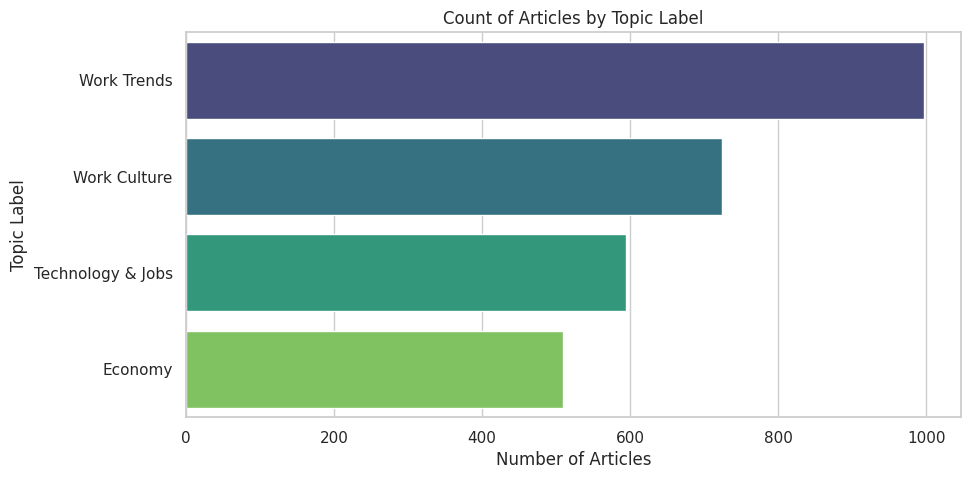

<ipython-input-35-d49cd2a79836>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected_lemmatized, x="view_label", palette="pastel")


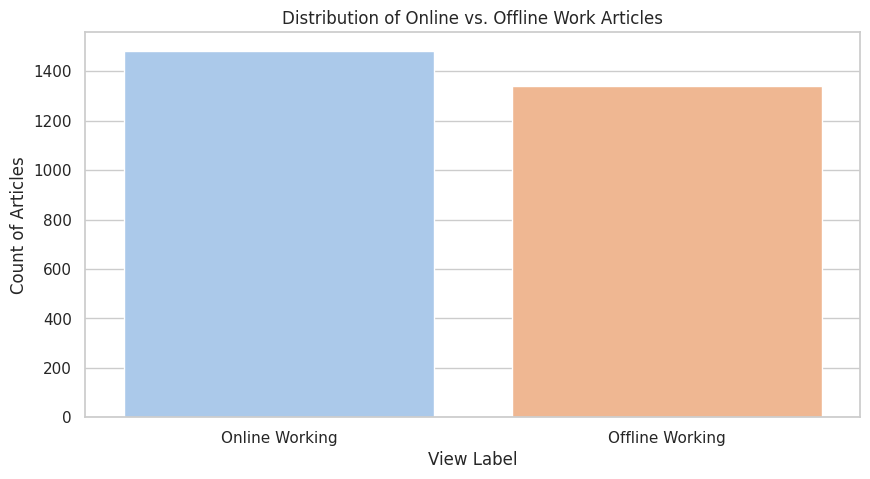

<ipython-input-35-d49cd2a79836>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected_lemmatized, y="query", order=df_selected_lemmatized["query"].value_counts().index[:10], palette="coolwarm")


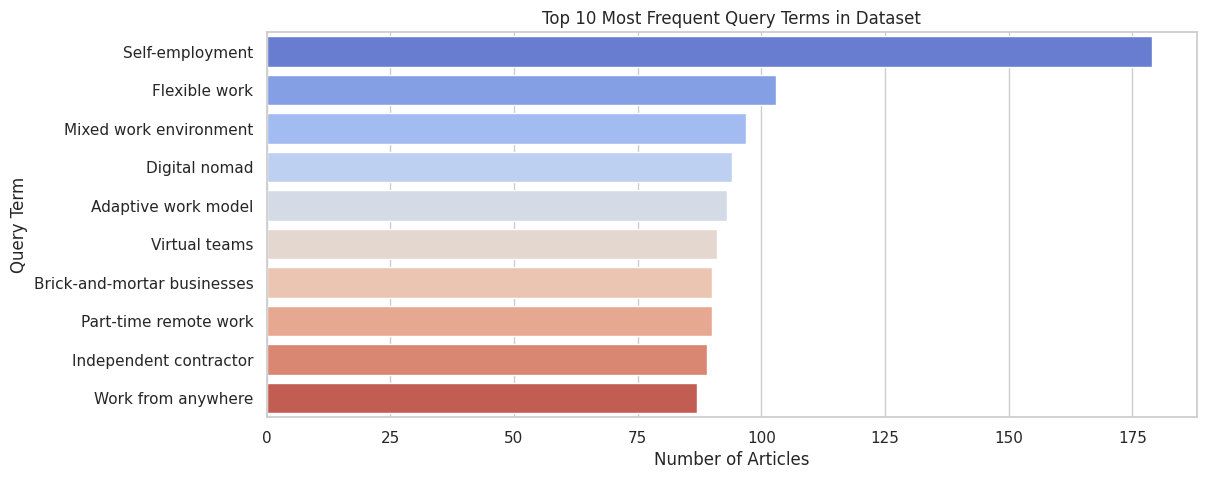

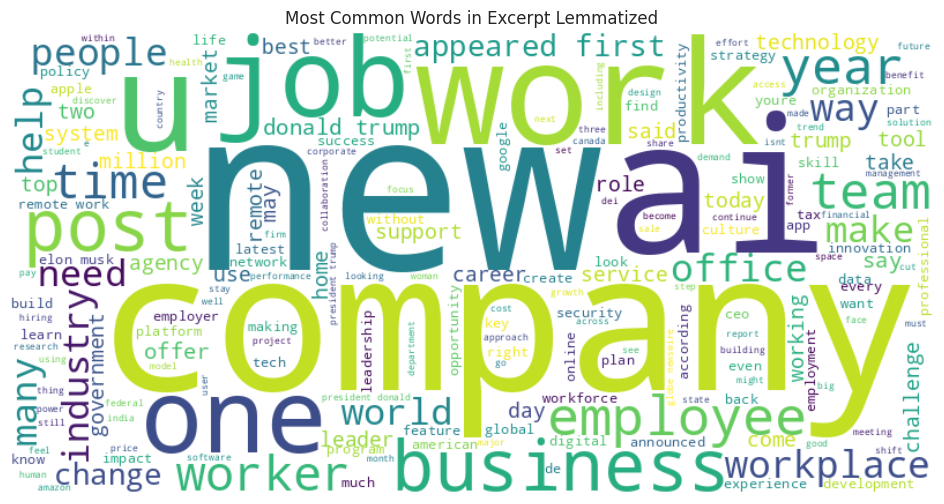

<ipython-input-35-d49cd2a79836>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


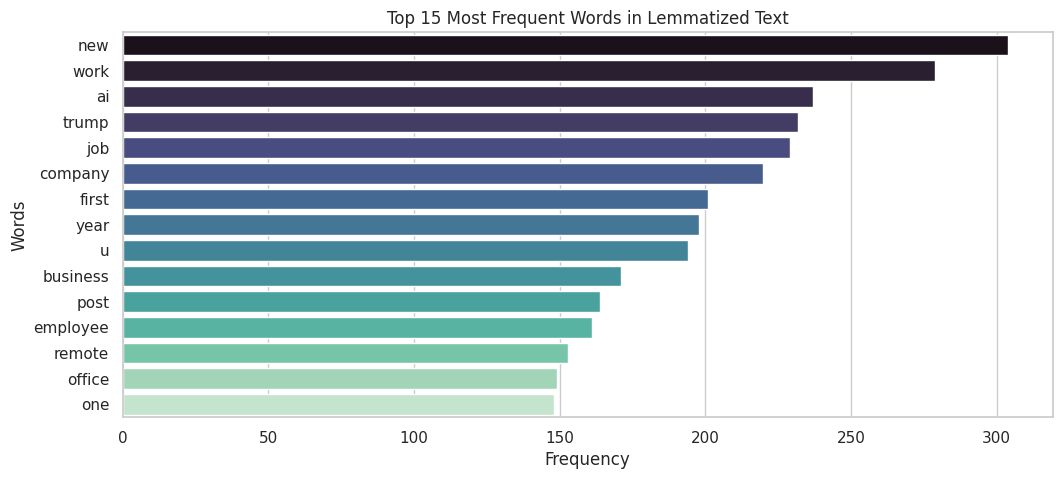

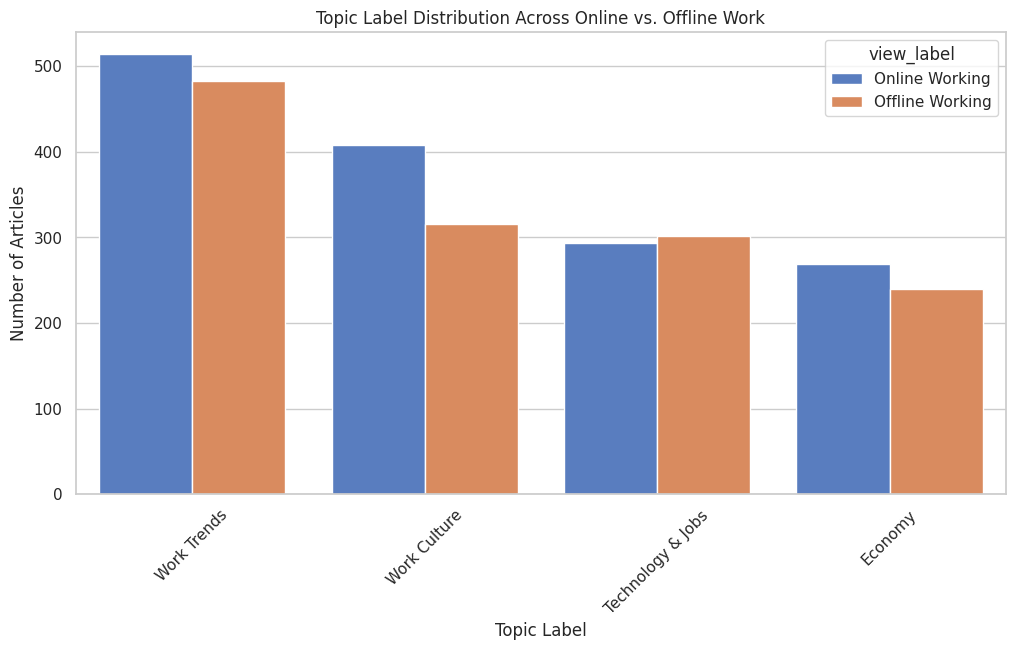

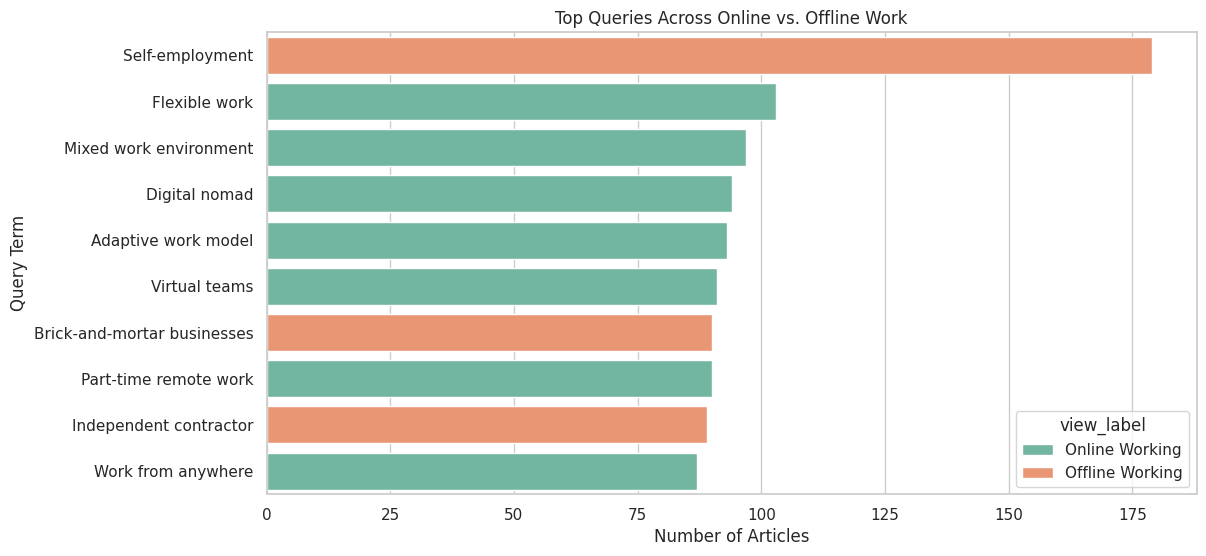

<ipython-input-35-d49cd2a79836>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_lemmatized["word_count"] = df_selected_lemmatized["excerpt_lemmatized"].apply(lambda x: len(str(x).split()))


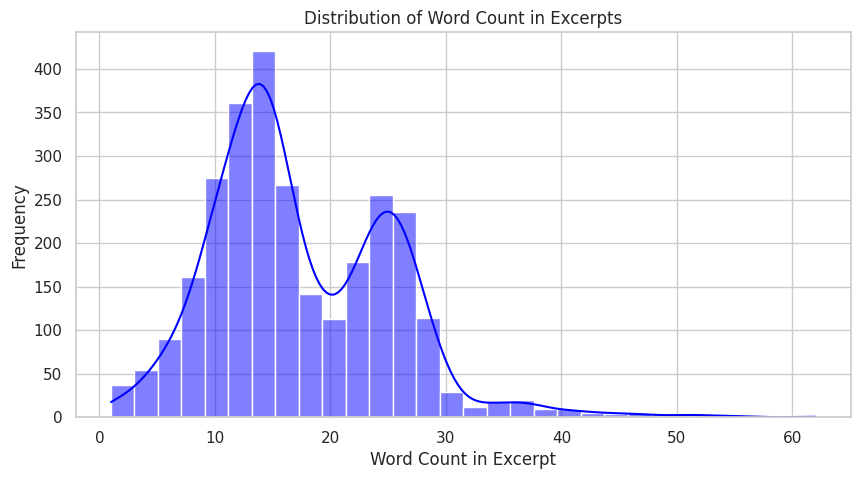

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter

nltk.download("punkt")
sns.set(style="whitegrid")

# 1. Count of Articles by Topic Label
plt.figure(figsize=(10, 5))
sns.countplot(data=df_selected_lemmatized, y="topic_label", order=df_selected_lemmatized["topic_label"].value_counts().index, palette="viridis")
plt.xlabel("Number of Articles")
plt.ylabel("Topic Label")
plt.title("Count of Articles by Topic Label")
plt.show()

# 2. Count of Articles by View Label
plt.figure(figsize=(10, 5))
sns.countplot(data=df_selected_lemmatized, x="view_label", palette="pastel")
plt.xlabel("View Label")
plt.ylabel("Count of Articles")
plt.title("Distribution of Online vs. Offline Work Articles")
plt.show()

# 3. Distribution of Queries (Most Frequent Topics Searched)
plt.figure(figsize=(12, 5))
sns.countplot(data=df_selected_lemmatized, y="query", order=df_selected_lemmatized["query"].value_counts().index[:10], palette="coolwarm")
plt.xlabel("Number of Articles")
plt.ylabel("Query Term")
plt.title("Top 10 Most Frequent Query Terms in Dataset")
plt.show()

# 4. Word Cloud for Excerpt Lemmatized (Most Common Words)
text = " ".join(df_selected_lemmatized["excerpt_lemmatized"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Excerpt Lemmatized")
plt.show()

# 5. Bar Chart of Most Frequent Words in Excerpt Lemmatized
word_tokens = nltk.word_tokenize(text)
word_freq = Counter(word_tokens)
common_words = word_freq.most_common(15)

words, counts = zip(*common_words)
plt.figure(figsize=(12, 5))
sns.barplot(x=list(counts), y=list(words), palette="mako")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 15 Most Frequent Words in Lemmatized Text")
plt.show()

# 6. Articles per Topic Over Online vs. Offline Working
plt.figure(figsize=(12, 6))
sns.countplot(data=df_selected_lemmatized, x="topic_label", hue="view_label", palette="muted")
plt.xlabel("Topic Label")
plt.ylabel("Number of Articles")
plt.title("Topic Label Distribution Across Online vs. Offline Work")
plt.xticks(rotation=45)
plt.show()

# 7. Query Distribution Across View Labels
plt.figure(figsize=(12, 6))
sns.countplot(data=df_selected_lemmatized, y="query", hue="view_label", order=df_selected_lemmatized["query"].value_counts().index[:10], palette="Set2")
plt.xlabel("Number of Articles")
plt.ylabel("Query Term")
plt.title("Top Queries Across Online vs. Offline Work")
plt.show()

# 8. Distribution of Word Length in Excerpts
df_selected_lemmatized["word_count"] = df_selected_lemmatized["excerpt_lemmatized"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df_selected_lemmatized["word_count"], bins=30, kde=True, color="blue")
plt.xlabel("Word Count in Excerpt")
plt.ylabel("Frequency")
plt.title("Distribution of Word Count in Excerpts")
plt.show()


count vectorizer

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

file_path = "/content/all_data_text_mining.csv"
df_countvectorizer = pd.read_csv(file_path)

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'\d+', '', text)  # Removeing numbers
    text = re.sub(r'[^\w\s]', '', text)  # Removeing punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keeping only English letters
    return text.lower().strip()

df_countvectorizer["cleaned_excerpt"] = df_countvectorizer["excerpt"].astype(str).apply(clean_text)
vectorizer = CountVectorizer(stop_words="english", max_features=2000)

X_counts = vectorizer.fit_transform(df_countvectorizer["cleaned_excerpt"])
count_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
count_df

abc  ability  able  abrir  abroad  accept  access  accessible  \
0       1        0     0      0       0       0       0           0   
1       0        0     0      0       0       0       0           0   
2       0        0     0      0       0       0       0           0   
3       0        0     0      0       0       0       0           0   
4       0        0     0      0       0       0       0           0   
...   ...      ...   ...    ...     ...     ...     ...         ...   
2821    0        0     0      0       0       0       0           0   
2822    0        0     0      0       0       0       0           0   
2823    0        0     0      0       0       0       0           0   
2824    0        0     0      0       0       0       0           0   
2825    0        0     0      0       0       0       0           0   

      according  account  ...  years  yes  york  youll  young  youre  youth  \
0             0        0  ...      0    0     0      0      0      0      0   
1             0        0  ...      0    0     0      0      1      0      0   
2             0        0  ...      0    0     0      0      0      0      0   
3             0        0  ...      0    0     0      0      0      0      0   
4             0        0  ...      0    0     0      0      0      0      0   
...         ...      ...  ...    ...  ...   ...    ...    ...    ...    ...   
2821          0        0  ...      0    0     0      0      0      0      0   
2822          0        0  ...      0    0     0      0      0      0      0   
2823          0        0  ...      0    0     0      0      0      0      0   
2824          0        0  ...      0    0     0      0      0      0      0   
2825          0        0  ...      0    0     0      0      0      0      0   

      youtube  youve  zealand  
0           0      0        0  
1           0      0        0  
2           0      0        0  
3           0      0        0  
4           0      0        0  
...       ...    ...      ...  
2821        0      0        0  
2822        0      0        0  
2823        0      0        0  
2824        0      0        0  
2825        0      0        0  

[2826 rows x 2000 columns]

In [ ]:
count_df.columns

Index(['abc', 'ability', 'able', 'abrir', 'abroad', 'accept', 'access',
       'accessible', 'according', 'account',
       ...
       'yes', 'york', 'youll', 'young', 'younger', 'youre', 'youth', 'youtube',
       'youve', 'zealand'],
      dtype='object', length=2000)

In [ ]:
count_df.to_csv("countvectorized_cleaned_data_text_mining.csv", index=False)

<ipython-input-27-038866cb508c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_sums.values, y=word_sums.index, palette="viridis")


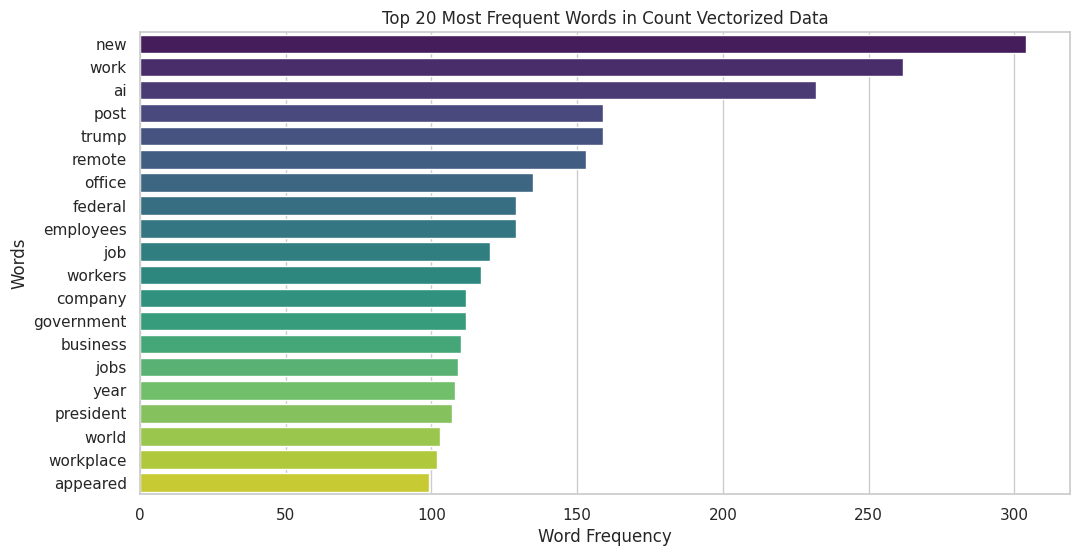

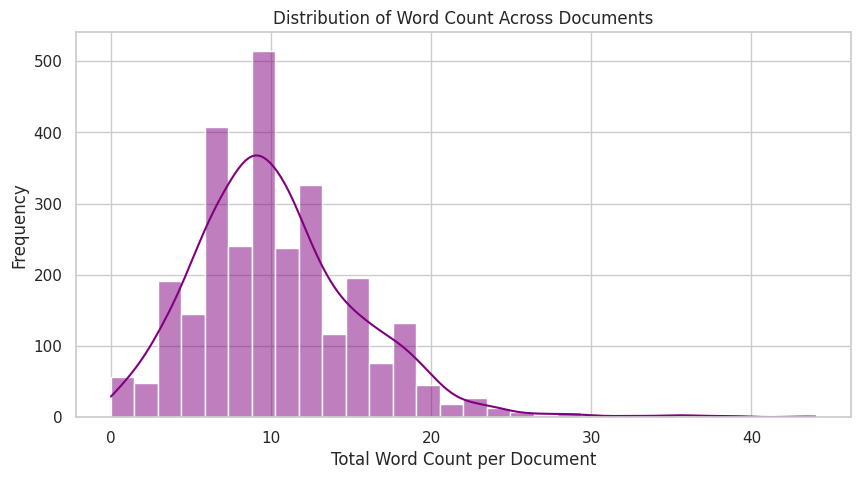

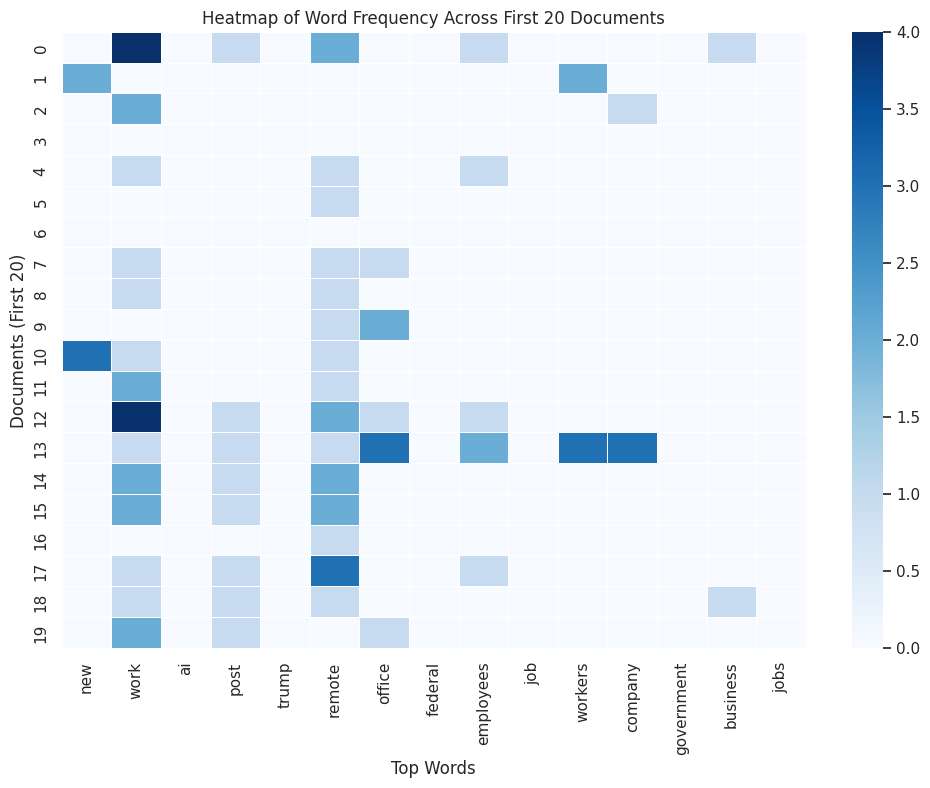

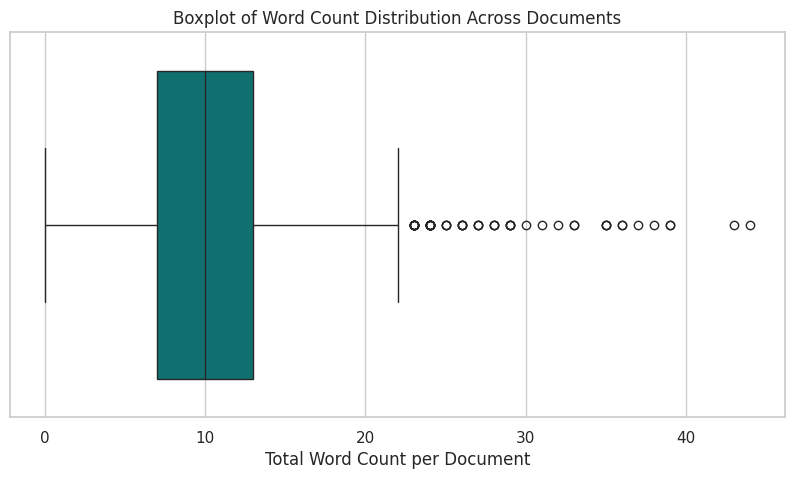

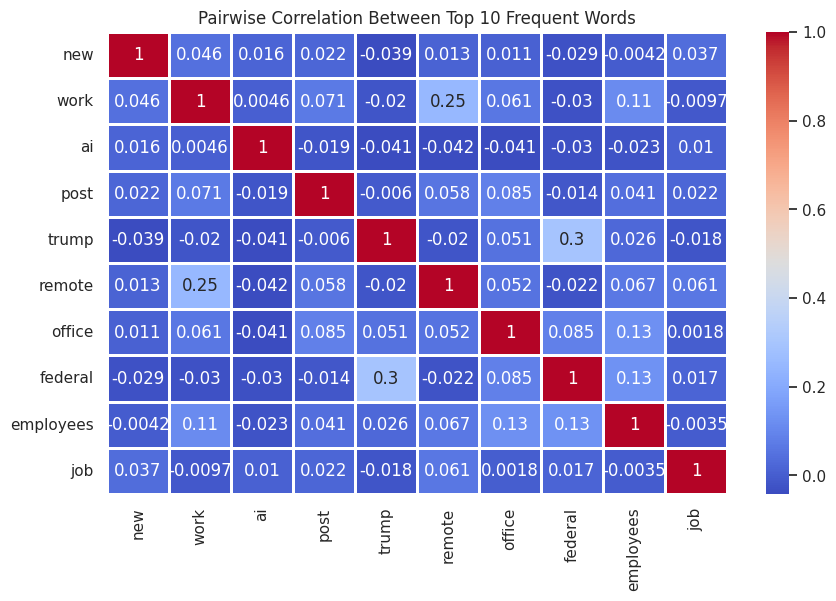

In [ ]:
import numpy as np

# 1. Distribution of Most Frequent Words (Top 20 words)
word_sums = count_df.sum(axis=0).sort_values(ascending=False)[:20]
plt.figure(figsize=(12, 6))
sns.barplot(x=word_sums.values, y=word_sums.index, palette="viridis")
plt.xlabel("Word Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words in Count Vectorized Data")
plt.show()

# 2. Word Frequency Distribution (Histogram of total word occurrences per document)
doc_word_counts = count_df.sum(axis=1)  # Sum words in each document
plt.figure(figsize=(10, 5))
sns.histplot(doc_word_counts, bins=30, kde=True, color="purple")
plt.xlabel("Total Word Count per Document")
plt.ylabel("Frequency")
plt.title("Distribution of Word Count Across Documents")
plt.show()

# 3. Heatmap of Most Frequent Words Across First 20 Documents
top_words = word_sums.index[:15]  # Select top 15 most frequent words
heatmap_data = count_df[top_words].iloc[:20]  # Select first 20 documents
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Blues", annot=False, linewidths=0.5)
plt.xlabel("Top Words")
plt.ylabel("Documents (First 20)")
plt.title("Heatmap of Word Frequency Across First 20 Documents")
plt.show()

# 4. Boxplot of Word Count Distribution Across Documents
plt.figure(figsize=(10, 5))
sns.boxplot(x=doc_word_counts, color="teal")
plt.xlabel("Total Word Count per Document")
plt.title("Boxplot of Word Count Distribution Across Documents")
plt.show()

# 5. Pairwise Correlation Between Most Frequent Words (Top 10 words)
top_10_words = word_sums.index[:10]
corr_matrix = count_df[top_10_words].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=1)
plt.title("Pairwise Correlation Between Top 10 Frequent Words")
plt.show()


##**Tfidf Vectorizer**

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

file_path = "/content/all_data_text_mining.csv"
df_TfidfVectorize = pd.read_csv(file_path)

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'\d+', '', text)  # Removeing numbers
    text = re.sub(r'[^\w\s]', '', text)  # Removeing punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keeping only English letters
    return text.lower().strip()

df_TfidfVectorize["cleaned_excerpt"] = df_TfidfVectorize["excerpt"].astype(str).apply(clean_text)
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=2000)
X_tfidf = tfidf_vectorizer.fit_transform(df_TfidfVectorize["cleaned_excerpt"])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df

abc  ability  able  abrir  abroad  accept  access  accessible  \
0     0.16822      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
1     0.00000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2     0.00000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
3     0.00000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
4     0.00000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
...       ...      ...   ...    ...     ...     ...     ...         ...   
2821  0.00000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2822  0.00000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2823  0.00000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2824  0.00000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2825  0.00000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   

      according  account  ...  yes  york  youll    young  younger  youre  \
0           0.0      0.0  ...  0.0   0.0    0.0  0.00000      0.0    0.0   
1           0.0      0.0  ...  0.0   0.0    0.0  0.19482      0.0    0.0   
2           0.0      0.0  ...  0.0   0.0    0.0  0.00000      0.0    0.0   
3           0.0      0.0  ...  0.0   0.0    0.0  0.00000      0.0    0.0   
4           0.0      0.0  ...  0.0   0.0    0.0  0.00000      0.0    0.0   
...         ...      ...  ...  ...   ...    ...      ...      ...    ...   
2821        0.0      0.0  ...  0.0   0.0    0.0  0.00000      0.0    0.0   
2822        0.0      0.0  ...  0.0   0.0    0.0  0.00000      0.0    0.0   
2823        0.0      0.0  ...  0.0   0.0    0.0  0.00000      0.0    0.0   
2824        0.0      0.0  ...  0.0   0.0    0.0  0.00000      0.0    0.0   
2825        0.0      0.0  ...  0.0   0.0    0.0  0.00000      0.0    0.0   

      youth  youtube  youve  zealand  
0       0.0      0.0    0.0      0.0  
1       0.0      0.0    0.0      0.0  
2       0.0      0.0    0.0      0.0  
3       0.0      0.0    0.0      0.0  
4       0.0      0.0    0.0      0.0  
...     ...      ...    ...      ...  
2821    0.0      0.0    0.0      0.0  
2822    0.0      0.0    0.0      0.0  
2823    0.0      0.0    0.0      0.0  
2824    0.0      0.0    0.0      0.0  
2825    0.0      0.0    0.0      0.0  

[2826 rows x 2000 columns]

In [ ]:
tfidf_df.columns

Index(['abc', 'ability', 'able', 'abrir', 'abroad', 'accept', 'access',
       'accessible', 'according', 'account',
       ...
       'yes', 'york', 'youll', 'young', 'younger', 'youre', 'youth', 'youtube',
       'youve', 'zealand'],
      dtype='object', length=2000)

In [ ]:
tfidf_df.to_csv("TFIDF_cleaned_data_text_mining.csv", index=False)

##**Clustering on TFIDF**





elbow method

Inertia for k=2: 5645296.62
Inertia for k=3: 5640696.24
Inertia for k=4: 5622303.64
Inertia for k=5: 5615530.16
Inertia for k=6: 5609619.32
Inertia for k=7: 5623681.17
Inertia for k=8: 5601307.80
Inertia for k=9: 5597416.73
Inertia for k=10: 5594746.73
Inertia for k=11: 5585105.65
Inertia for k=12: 5579349.51
Inertia for k=13: 5582004.53
Inertia for k=14: 5558979.26
Inertia for k=15: 5570023.83


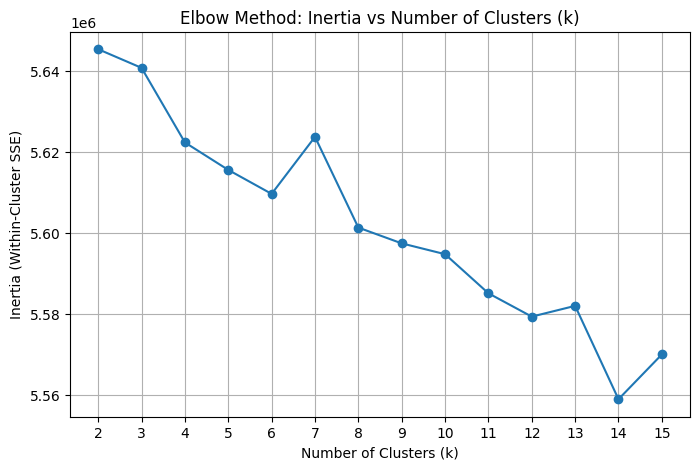

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/TFIDF_cleaned_data_text_mining.csv")
#scaling
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

k_range = range(2, 16)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
    print(f"Inertia for k={k}: {kmeans.inertia_:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(list(k_range), inertias, marker='o')
plt.title("Elbow Method: Inertia vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.xticks(list(k_range))
plt.grid(True)
plt.show()


In [ ]:
scaled_df

abc   ability      able     abrir    abroad    accept    access  \
0     14.849506 -0.055036 -0.049343 -0.040266 -0.054455 -0.045509 -0.110535   
1     -0.051540 -0.055036 -0.049343 -0.040266 -0.054455 -0.045509 -0.110535   
2     -0.051540 -0.055036 -0.049343 -0.040266 -0.054455 -0.045509 -0.110535   
3     -0.051540 -0.055036 -0.049343 -0.040266 -0.054455 -0.045509 -0.110535   
4     -0.051540 -0.055036 -0.049343 -0.040266 -0.054455 -0.045509 -0.110535   
...         ...       ...       ...       ...       ...       ...       ...   
2821  -0.051540 -0.055036 -0.049343 -0.040266 -0.054455 -0.045509 -0.110535   
2822  -0.051540 -0.055036 -0.049343 -0.040266 -0.054455 -0.045509 -0.110535   
2823  -0.051540 -0.055036 -0.049343 -0.040266 -0.054455 -0.045509 -0.110535   
2824  -0.051540 -0.055036 -0.049343 -0.040266 -0.054455 -0.045509 -0.110535   
2825  -0.051540 -0.055036 -0.049343 -0.040266 -0.054455 -0.045509 -0.110535   

      accessible  according   account  ...       yes      york     youll  \
0      -0.051652  -0.132753 -0.049075  ... -0.049179 -0.083506 -0.054586   
1      -0.051652  -0.132753 -0.049075  ... -0.049179 -0.083506 -0.054586   
2      -0.051652  -0.132753 -0.049075  ... -0.049179 -0.083506 -0.054586   
3      -0.051652  -0.132753 -0.049075  ... -0.049179 -0.083506 -0.054586   
4      -0.051652  -0.132753 -0.049075  ... -0.049179 -0.083506 -0.054586   
...          ...        ...       ...  ...       ...       ...       ...   
2821   -0.051652  -0.132753 -0.049075  ... -0.049179 -0.083506 -0.054586   
2822   -0.051652  -0.132753 -0.049075  ... -0.049179 -0.083506 -0.054586   
2823   -0.051652  -0.132753 -0.049075  ... -0.049179 -0.083506 -0.054586   
2824   -0.051652  -0.132753 -0.049075  ... -0.049179 -0.083506 -0.054586   
2825   -0.051652  -0.132753 -0.049075  ... -0.049179 -0.083506 -0.054586   

          young   younger     youre     youth   youtube     youve   zealand  
0     -0.063859 -0.041025 -0.133461 -0.048734 -0.045022 -0.071769 -0.045527  
1     10.747884 -0.041025 -0.133461 -0.048734 -0.045022 -0.071769 -0.045527  
2     -0.063859 -0.041025 -0.133461 -0.048734 -0.045022 -0.071769 -0.045527  
3     -0.063859 -0.041025 -0.133461 -0.048734 -0.045022 -0.071769 -0.045527  
4     -0.063859 -0.041025 -0.133461 -0.048734 -0.045022 -0.071769 -0.045527  
...         ...       ...       ...       ...       ...       ...       ...  
2821  -0.063859 -0.041025 -0.133461 -0.048734 -0.045022 -0.071769 -0.045527  
2822  -0.063859 -0.041025 -0.133461 -0.048734 -0.045022 -0.071769 -0.045527  
2823  -0.063859 -0.041025 -0.133461 -0.048734 -0.045022 -0.071769 -0.045527  
2824  -0.063859 -0.041025 -0.133461 -0.048734 -0.045022 -0.071769 -0.045527  
2825  -0.063859 -0.041025 -0.133461 -0.048734 -0.045022 -0.071769 -0.045527  

[2826 rows x 2000 columns]

Silhouette Score for k=2: 0.1498
Silhouette Score for k=3: -0.0095
Silhouette Score for k=4: -0.0004
Silhouette Score for k=5: 0.0083
Silhouette Score for k=6: 0.0069
Silhouette Score for k=7: -0.0104
Silhouette Score for k=8: -0.0026
Silhouette Score for k=9: -0.0410
Silhouette Score for k=10: -0.0185
Silhouette Score for k=11: -0.0251
Silhouette Score for k=12: -0.0193
Silhouette Score for k=13: -0.0358
Silhouette Score for k=14: -0.0089
Silhouette Score for k=15: -0.0309


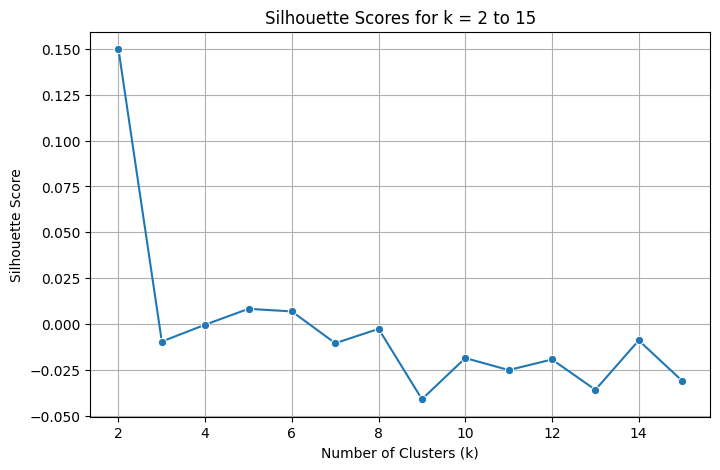


Best k based on silhouette score: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


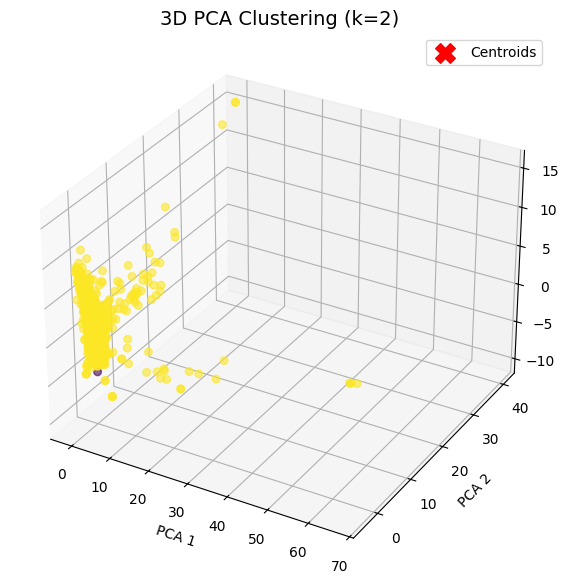

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("/content/TFIDF_cleaned_data_text_mining.csv")

scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

k_range = range(2, 16)
silhouette_scores = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score for k={k}: {score:.4f}")

plt.figure(figsize=(8, 5))
sns.lineplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), marker='o')
plt.title("Silhouette Scores for k = 2 to 15")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest k based on silhouette score: {best_k}")

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(scaled_df)

pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)
centroids_pca = pca.transform(kmeans_final.cluster_centers_)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_data[:, 0], pca_data[:, 1], pca_data[:, 2],
    c=final_labels, cmap='viridis', s=30, alpha=0.6
)

ax.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2],
    c='red', marker='X', s=200, label='Centroids'
)

ax.set_title(f"3D PCA Clustering (k={best_k})", fontsize=14)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.legend()
plt.show()


**HCLUST USING PYTHON**

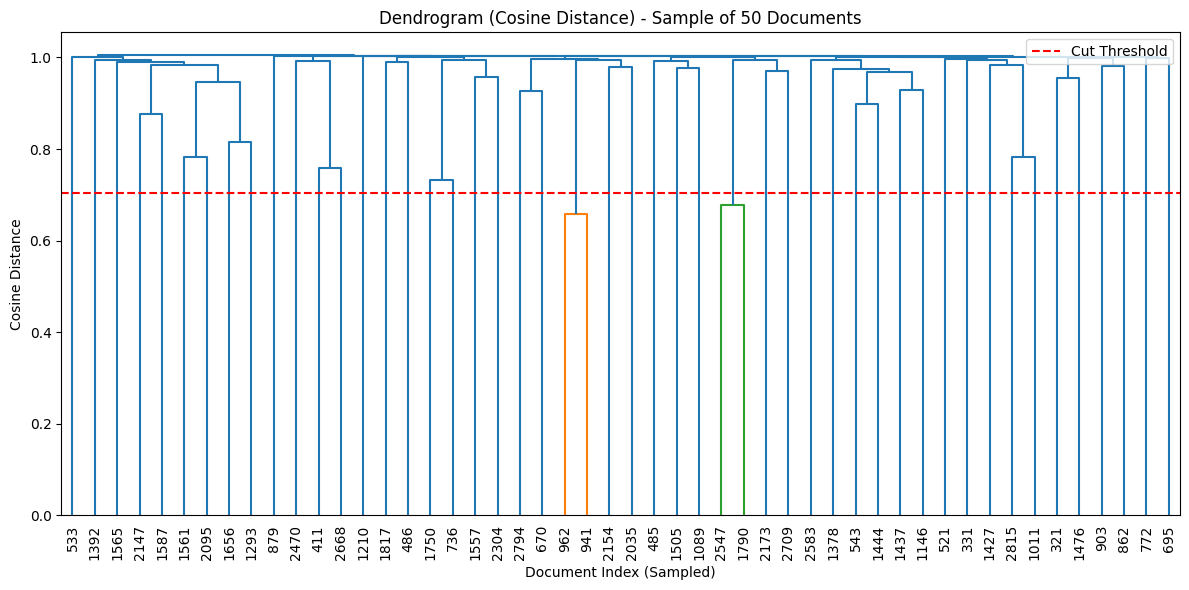

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

df = pd.read_csv("/content/TFIDF_cleaned_data_text_mining.csv")

scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

sample_size = 50
np.random.seed(42)
sample_indices = np.random.choice(scaled_df.shape[0], size=sample_size, replace=False)
df_sample = scaled_df.iloc[sample_indices]

distance_sample = pdist(df_sample.values, metric='cosine')
Z_sample = linkage(distance_sample, method='average')

plt.figure(figsize=(12, 6))
dendrogram(
    Z_sample,
    labels=sample_indices,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0.7 * max(Z_sample[:, 2])
)
plt.axhline(y=0.7 * max(Z_sample[:, 2]), c='red', linestyle='--', label="Cut Threshold")
plt.title("Dendrogram (Cosine Distance) - Sample of 50 Documents")
plt.xlabel("Document Index (Sampled)")
plt.ylabel("Cosine Distance")
plt.legend()
plt.tight_layout()
plt.show()


HCLUST using R

In [ ]:
install.packages("coop")
install.packages("dendextend")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



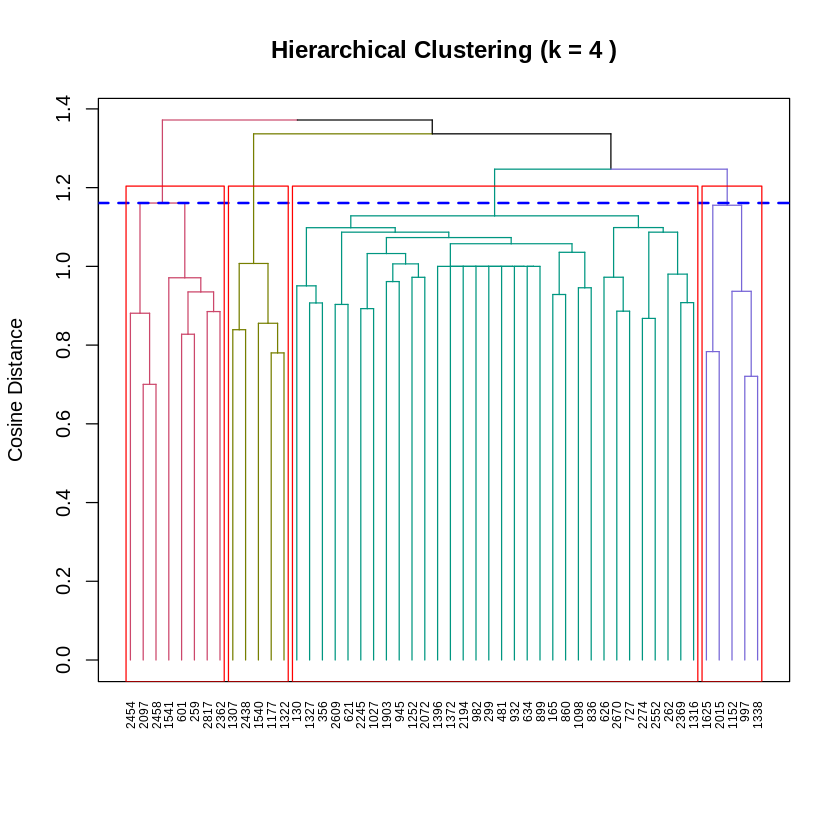

In [ ]:
library(coop)
library(dendextend)

data <- read.csv("/content/TFIDF_cleaned_data_text_mining.csv")

set.seed(42)
sample_indices <- sample(1:nrow(data), 50)
sample_data <- data[sample_indices, ]

cos_sim <- cosine(t(sample_data))
cos_dist <- as.dist(1 - cos_sim)

hc <- hclust(cos_dist, method = "ward.D2")
k <- 4
dend <- as.dendrogram(hc)
dend_colored <- color_branches(dend, k = k)

par(mar = c(6.5, 4, 4, 2) + 0.1)
plot(dend_colored,
     main = paste("Hierarchical Clustering (k =", k, ")"),
     ylab = "Cosine Distance",
     xlab = "",
     sub = "",
     axes = FALSE,
     leaflab = "none")

labels <- labels(dend_colored)
label_positions <- 1:length(labels)
text(x = label_positions,
     y = rep(par("usr")[3] - 0.05, length(labels)),
     labels = labels,
     srt = 90,
     adj = 1,
     xpd = TRUE,
     cex = 0.6)

axis(2)
box()
cut_height <- hc$height[length(hc$height) - (k - 1)]
abline(h = cut_height, col = "blue", lty = 2, lwd = 2)
rect.hclust(hc, k = k, border = "red")

##**ARM**

converting into tranctional data

In [ ]:
import pandas as pd
import re

df = pd.read_csv("/content/lemmatized_cleaned_data_text_mining.csv")

def clean_and_tokenize(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    return list(set(tokens))  # Removeing duplicates within a transaction

df['transaction'] = df['excerpt_lemmatized'].apply(clean_and_tokenize)
df['transaction_str'] = df['transaction'].apply(lambda x: ','.join(x))

txt_path = "transactions.txt"
with open(txt_path, "w", encoding="utf-8") as f:
    for line in df['transaction_str']:
        f.write(f"{line}\n")

txt_path


'transactions.txt'

In [ ]:
install.packages("arules")
install.packages("arulesViz")

library(arules)
library(arulesViz)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
file_path <- "/content/transactions.txt"
transactions <- read.transactions(file_path, format = "basket", sep = ",")

summary(transactions)
rules <- apriori(transactions,
                 parameter = list(supp = 0.01, conf = 0.5, minlen = 2))

# Top 15 rules by support
top_support <- head(sort(rules, by = "support", decreasing = TRUE), 15)
inspect(top_support)

# Top 15 rules by confidence
top_conf <- head(sort(rules, by = "confidence", decreasing = TRUE), 15)
inspect(top_conf)

# Top 15 rules by lift
top_lift <- head(sort(rules, by = "lift", decreasing = TRUE), 15)
inspect(top_lift)

transactions as itemMatrix in sparse format with
 2826 rows (elements/itemsets/transactions) and
 11377 columns (items) and a density of 0.001444572 

most frequent items:
    new    work   trump company   first (Other) 
    275     233     216     201     197   45323 

element (itemset/transaction) length distribution:
sizes
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
  3  16  10  18  27  32  40  55  65 110 131 164 172 225 233 196 146 110  78  77 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
 84 100 120  98 133 117  79  61  30  22  10   7   7   5  11   9   6   4   5   1 
 43  44  46  47  48  50 
  1   2   2   1   2   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   12.00   15.00   16.43   22.00   50.00 

includes extended item information - examples:
        labels
1            a
2         aarp
3 aatmanirbhar

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 28 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11377 item(s), 2826 transaction(s)] done [0.05s].
sorting and recoding items ... [249 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [22 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                    rhs         support    confidence coverage  
[1]  {post}              => {first}     0.03857042 0.6687117  0.05767870
[2]  {first}             => {post}      0.03857042 0.5532995  0.06970984
[3]  {appeared}          => {post}      0.03432413 0.9797980  0.035

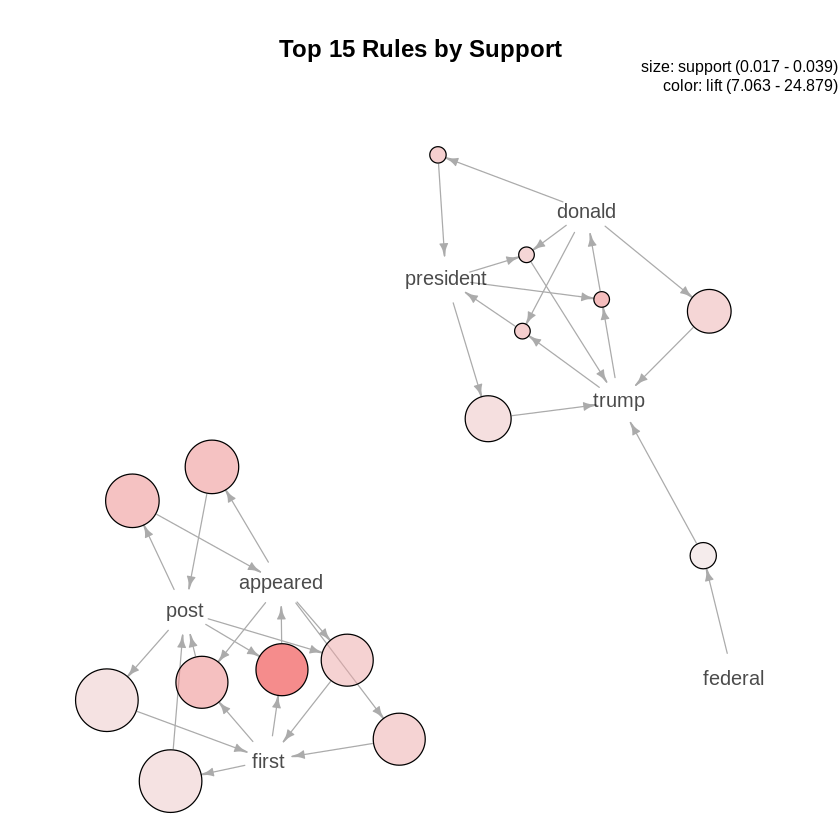

In [ ]:
plot(top_support, method = "graph", engine = "igraph", main = "Top 15 Rules by Support")


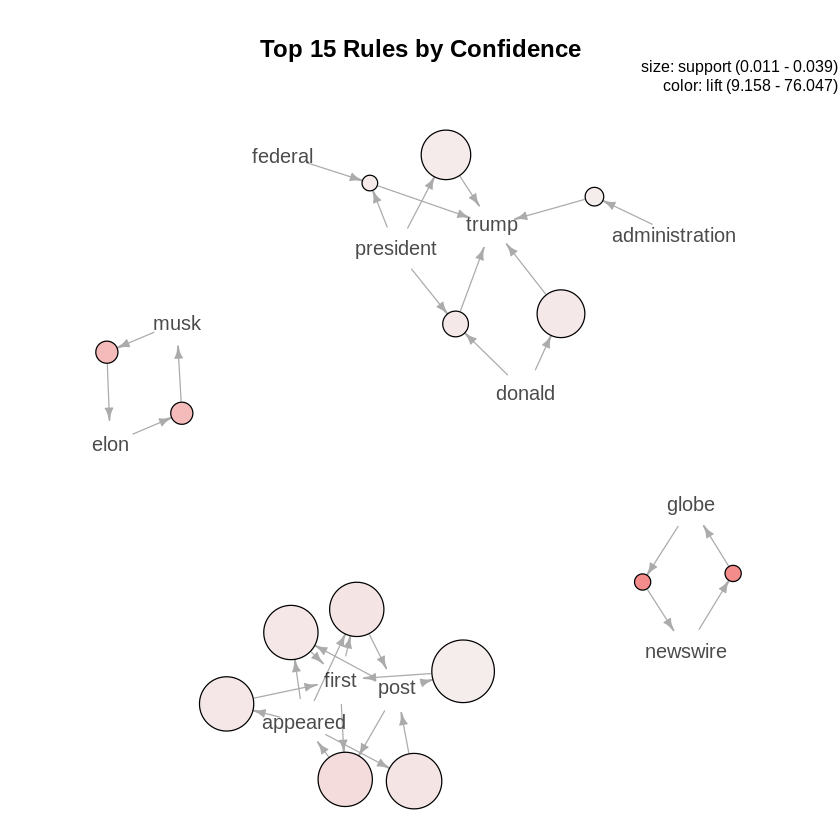

In [ ]:
plot(top_conf, method = "graph", engine = "igraph", main = "Top 15 Rules by Confidence")


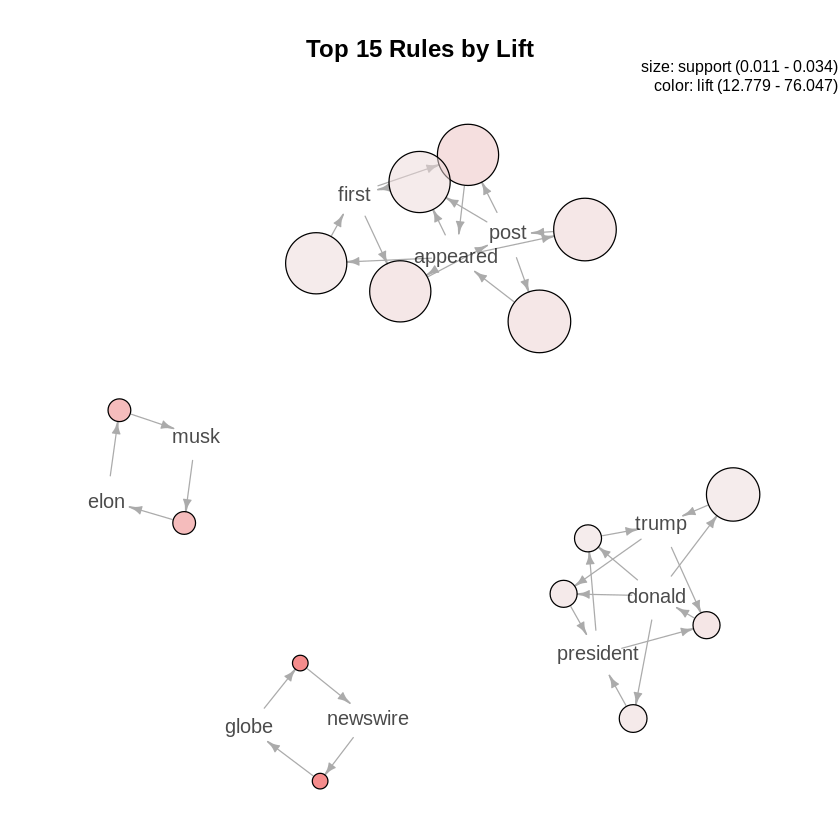

In [ ]:
plot(top_lift, method = "graph", engine = "igraph", main = "Top 15 Rules by Lift")

##**LDA**

In [ ]:
import pandas as pd

df_count = pd.read_csv("/content/countvectorized_cleaned_data_text_mining.csv")

if 'LABEL' in df_count.columns:
    df_count = df_count.drop('LABEL', axis=1)
df_count.head()


abc  ability  able  abrir  abroad  accept  access  accessible  according  \
0    1        0     0      0       0       0       0           0          0   
1    0        0     0      0       0       0       0           0          0   
2    0        0     0      0       0       0       0           0          0   
3    0        0     0      0       0       0       0           0          0   
4    0        0     0      0       0       0       0           0          0   

   account  ...  yes  york  youll  young  younger  youre  youth  youtube  \
0        0  ...    0     0      0      0        0      0      0        0   
1        0  ...    0     0      0      1        0      0      0        0   
2        0  ...    0     0      0      0        0      0      0        0   
3        0  ...    0     0      0      0        0      0      0        0   
4        0  ...    0     0      0      0        0      0      0        0   

   youve  zealand  
0      0        0  
1      0        0  
2      0        0  
3      0        0  
4      0        0  

[5 rows x 2000 columns]

In [ ]:
df_count

abc  ability  able  abrir  abroad  accept  access  accessible  \
0       1        0     0      0       0       0       0           0   
1       0        0     0      0       0       0       0           0   
2       0        0     0      0       0       0       0           0   
3       0        0     0      0       0       0       0           0   
4       0        0     0      0       0       0       0           0   
...   ...      ...   ...    ...     ...     ...     ...         ...   
2821    0        0     0      0       0       0       0           0   
2822    0        0     0      0       0       0       0           0   
2823    0        0     0      0       0       0       0           0   
2824    0        0     0      0       0       0       0           0   
2825    0        0     0      0       0       0       0           0   

      according  account  ...  yes  york  youll  young  younger  youre  youth  \
0             0        0  ...    0     0      0      0        0      0      0   
1             0        0  ...    0     0      0      1        0      0      0   
2             0        0  ...    0     0      0      0        0      0      0   
3             0        0  ...    0     0      0      0        0      0      0   
4             0        0  ...    0     0      0      0        0      0      0   
...         ...      ...  ...  ...   ...    ...    ...      ...    ...    ...   
2821          0        0  ...    0     0      0      0        0      0      0   
2822          0        0  ...    0     0      0      0        0      0      0   
2823          0        0  ...    0     0      0      0        0      0      0   
2824          0        0  ...    0     0      0      0        0      0      0   
2825          0        0  ...    0     0      0      0        0      0      0   

      youtube  youve  zealand  
0           0      0        0  
1           0      0        0  
2           0      0        0  
3           0      0        0  
4           0      0        0  
...       ...    ...      ...  
2821        0      0        0  
2822        0      0        0  
2823        0      0        0  
2824        0      0        0  
2825        0      0        0  

[2826 rows x 2000 columns]

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(df_count)

feature_names = df_count.columns

def print_topics(model, feature_names, top_n=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n Topic #{topic_idx + 1}")
        top_features = [feature_names[i] for i in topic.argsort()[:-top_n - 1:-1]]
        print("Top words:", ", ".join(top_features))

print_topics(lda_model, feature_names)



 Topic #1
Top words: new, job, report, work, jobs, security, management, market, tax, company

 Topic #2
Top words: federal, trump, government, president, donald, new, job, workers, work, employees

 Topic #3
Top words: work, ai, employees, new, post, teams, workplace, need, home, culture

 Topic #4
Top words: ai, remote, jobs, new, business, employment, workers, year, companies, world

 Topic #5
Top words: new, post, office, appeared, week, microsoft, people, google, trumps, time


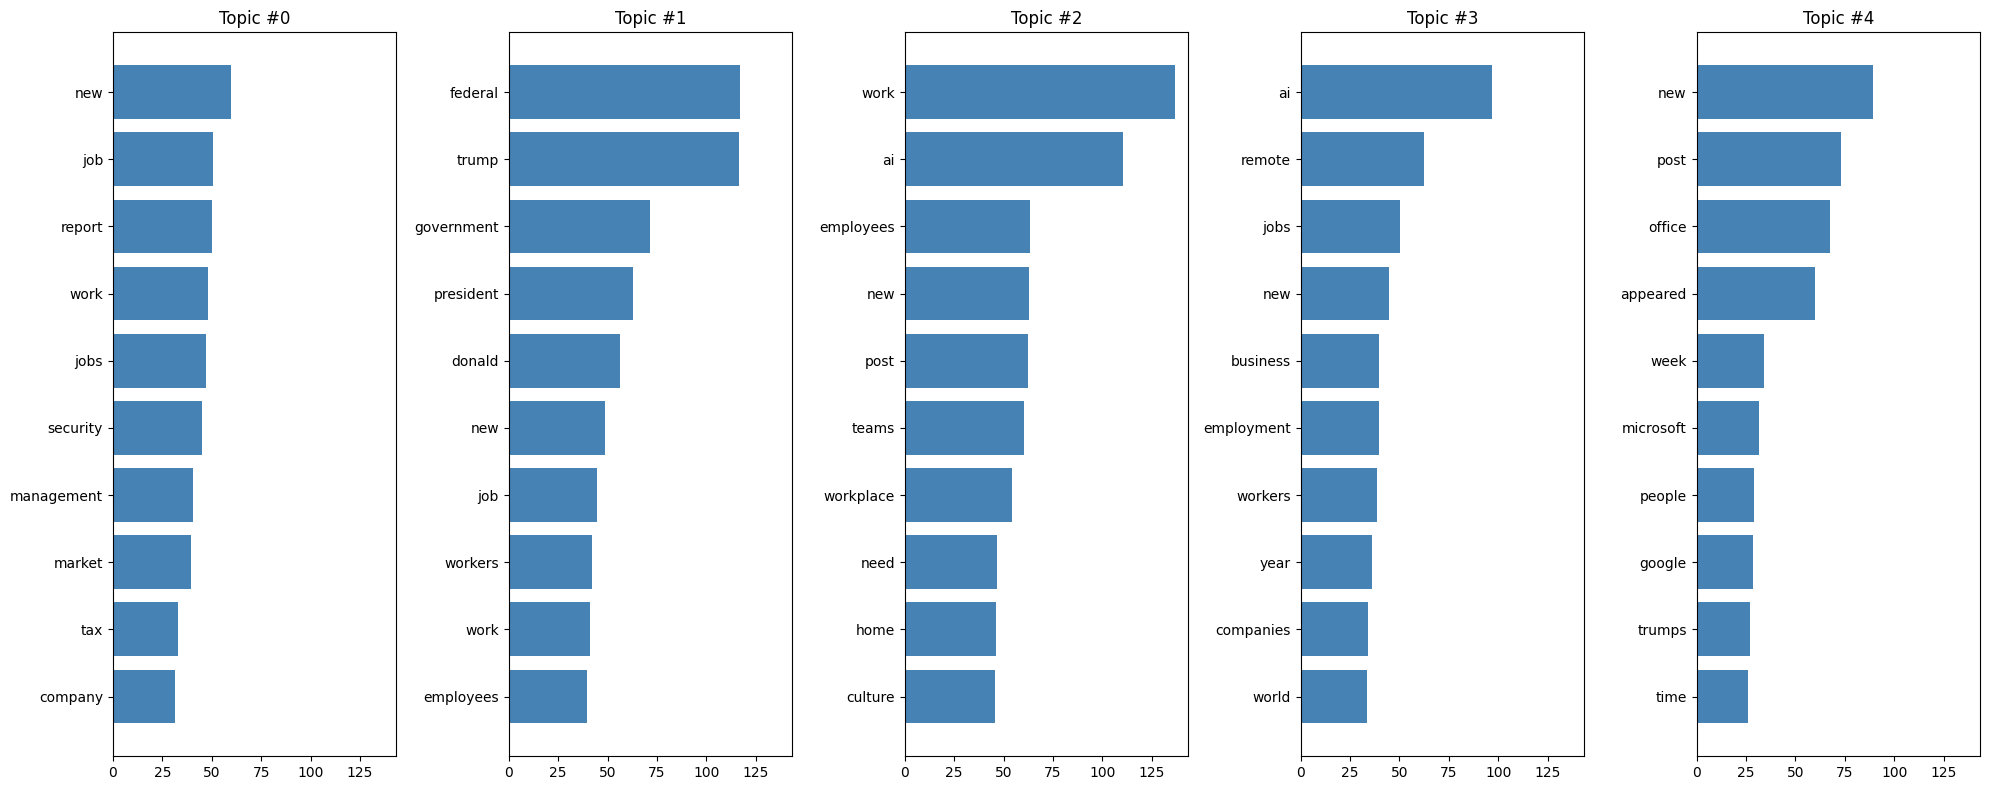

In [ ]:

import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(1, model.n_components, figsize=(20, 8), sharex=True)
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_indices]
        weights = topic[top_indices]

        ax = axes[topic_idx]
        ax.barh(top_words, weights, color='steelblue')
        ax.set_title(f"Topic #{topic_idx}")
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

plot_top_words(lda_model, feature_names)


In [ ]:
import os
import pyLDAvis
from pyLDAvis import prepare
import numpy as np

os.environ["JOBLIB_MULTIPROCESSING"] = "0"

topic_term_dists = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
doc_topic_dists = lda_model.transform(df_count)
doc_topic_dists = doc_topic_dists / doc_topic_dists.sum(axis=1)[:, np.newaxis]
doc_lengths = df_count.sum(axis=1).values
term_frequency = df_count.sum(axis=0).values
vocab = df_count.columns

vis_data = prepare(
    topic_term_dists=topic_term_dists,
    doc_topic_dists=doc_topic_dists,
    doc_lengths=doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency
)

pyLDAvis.save_html(vis_data, "lda_interactive_visualization.html")


##**Naïve Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("/content/all_data_text_mining.csv")
df.head()

title  \
0  The Future of Remote Work: How Businesses Can ...   
1  Young workers twice as likely to take mental h...   
2  Media Release: Great Place To Work® Ranking: A...   
3  Swiggy IPO: How many food delivery partners do...   
4  JP Morgan’s return-to-office push hits snag: t...   

                                                 url  \
0  https://www.abcmoney.co.uk/2025/02/the-future-...   
1  https://bmmagazine.co.uk/in-business/young-wor...   
2  https://financialpost.com/pmn/business-wire-ne...   
3  https://www.thehindubusinessline.com/companies...   
4  https://bmmagazine.co.uk/news/jp-morgans-retur...   

                                             excerpt  topic_label  \
0  Remote work has become an integral part of the...  Work Trends   
1  New research shows that 30% of Gen Z workers w...  Work Trends   
2  First-ever global ranking for Allianz Group pl...  Work Trends   
3  Swiggy leverages technology and flexible worki...  Work Trends   
4  JP Morgan has ordered all London staff back to...  Work Trends   

       view_label          query Title Link Published Source Description  
0  Online Working  Flexible work   NaN  NaN       NaN    NaN         NaN  
1  Online Working  Flexible work   NaN  NaN       NaN    NaN         NaN  
2  Online Working  Flexible work   NaN  NaN       NaN    NaN         NaN  
3  Online Working  Flexible work   NaN  NaN       NaN    NaN         NaN  
4  Online Working    Remote work   NaN  NaN       NaN    NaN         NaN

In [ ]:
df.columns

Index(['title', 'url', 'excerpt', 'topic_label', 'view_label', 'query',
       'Title', 'Link', 'Published', 'Source', 'Description'],
      dtype='object')

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/all_data_text_mining.csv"
df = pd.read_csv(file_path)

df = df[["excerpt", "view_label"]].dropna()

def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().strip()

df["cleaned_excerpt"] = df["excerpt"].astype(str).apply(clean_text)
df = df[df["cleaned_excerpt"].str.strip() != ""]

# Encode labels: 'Online Working' to 1, 'Offline Working' to 0
label_encoder = LabelEncoder()
df["encoded_label"] = label_encoder.fit_transform(df["view_label"])
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=2000)
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned_excerpt"])
y = df["encoded_label"]




<ipython-input-2-7a6e710782d9>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["encoded_label"] = label_encoder.fit_transform(df["view_label"])


In [ ]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df["label"] = y.values
tfidf_df.head()


abc  ability  able  abrir  abroad  accept  access  accessible  \
0  0.168229      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
1  0.000000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2  0.000000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
3  0.000000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
4  0.000000      0.0   0.0    0.0     0.0     0.0     0.0         0.0   

   according  account  ...  york  youll    young  younger  youre  youth  \
0        0.0      0.0  ...   0.0    0.0  0.00000      0.0    0.0    0.0   
1        0.0      0.0  ...   0.0    0.0  0.19034      0.0    0.0    0.0   
2        0.0      0.0  ...   0.0    0.0  0.00000      0.0    0.0    0.0   
3        0.0      0.0  ...   0.0    0.0  0.00000      0.0    0.0    0.0   
4        0.0      0.0  ...   0.0    0.0  0.00000      0.0    0.0    0.0   

   youtube  youve  zealand  label  
0      0.0    0.0      0.0      1  
1      0.0    0.0      0.0      1  
2      0.0    0.0      0.0      1  
3      0.0    0.0      0.0      1  
4      0.0    0.0      0.0      1  

[5 rows x 2001 columns]

In [ ]:
y.value_counts()

encoded_label
1    1483
0    1339
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)



In [ ]:
import pandas as pd

feature_names = tfidf_vectorizer.get_feature_names_out()

X_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
X_test_df = pd.DataFrame(X_test.toarray(), columns=feature_names)
y_train_df = pd.DataFrame(y_train.values, columns=["label"])
y_test_df = pd.DataFrame(y_test.values, columns=["label"])

In [ ]:
X_train_df

abc  ability  able  abrir  abroad  accept  access  accessible  \
0     0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
1     0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2     0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
3     0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
4     0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
...   ...      ...   ...    ...     ...     ...     ...         ...   
2252  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2253  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2254  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2255  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2256  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   

      according  account  ...  yes  york  youll  young  younger  youre  youth  \
0           0.0      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0   
1           0.0      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0   
2           0.0      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0   
3           0.0      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0   
4           0.0      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0   
...         ...      ...  ...  ...   ...    ...    ...      ...    ...    ...   
2252        0.0      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0   
2253        0.0      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0   
2254        0.0      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0   
2255        0.0      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0   
2256        0.0      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0   

      youtube  youve  zealand  
0         0.0    0.0      0.0  
1         0.0    0.0      0.0  
2         0.0    0.0      0.0  
3         0.0    0.0      0.0  
4         0.0    0.0      0.0  
...       ...    ...      ...  
2252      0.0    0.0      0.0  
2253      0.0    0.0      0.0  
2254      0.0    0.0      0.0  
2255      0.0    0.0      0.0  
2256      0.0    0.0      0.0  

[2257 rows x 2000 columns]

In [ ]:
X_test_df

abc  ability  able  abrir  abroad  accept  access  accessible  according  \
0    0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0        0.0   
1    0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0        0.0   
2    0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0        0.0   
3    0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0        0.0   
4    0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0        0.0   
..   ...      ...   ...    ...     ...     ...     ...         ...        ...   
560  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0        0.0   
561  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0        0.0   
562  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0        0.0   
563  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0        0.0   
564  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0        0.0   

     account  ...  yes  york  youll  young  younger  youre  youth  youtube  \
0        0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0      0.0   
1        0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0      0.0   
2        0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0      0.0   
3        0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0      0.0   
4        0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0      0.0   
..       ...  ...  ...   ...    ...    ...      ...    ...    ...      ...   
560      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0      0.0   
561      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0      0.0   
562      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0      0.0   
563      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0      0.0   
564      0.0  ...  0.0   0.0    0.0    0.0      0.0    0.0    0.0      0.0   

     youve  zealand  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0  
..     ...      ...  
560    0.0      0.0  
561    0.0      0.0  
562    0.0      0.0  
563    0.0      0.0  
564    0.0      0.0  

[565 rows x 2000 columns]

In [ ]:
y_train_df

label
0         1
1         0
2         1
3         0
4         1
...     ...
2252      1
2253      0
2254      0
2255      1
2256      0

[2257 rows x 1 columns]

In [ ]:
y_test_df

label
0        0
1        1
2        0
3        1
4        1
..     ...
560      1
561      1
562      0
563      1
564      0

[565 rows x 1 columns]

Accuracy: 0.5964601769911504

Classification Report:
                  precision    recall  f1-score   support

Offline Working       0.58      0.55      0.56       268
 Online Working       0.61      0.64      0.62       297

       accuracy                           0.60       565
      macro avg       0.59      0.59      0.59       565
   weighted avg       0.60      0.60      0.60       565



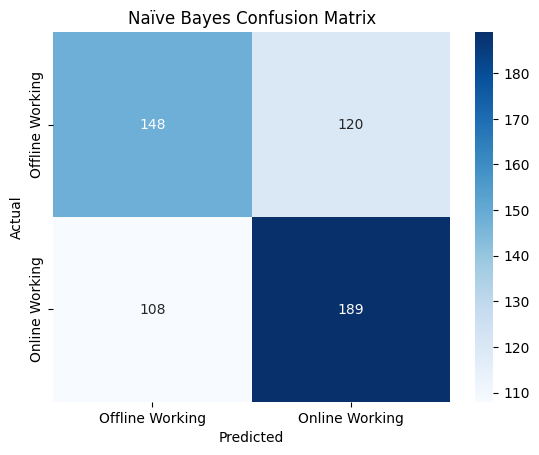

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Naïve Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##**Decision Tree**

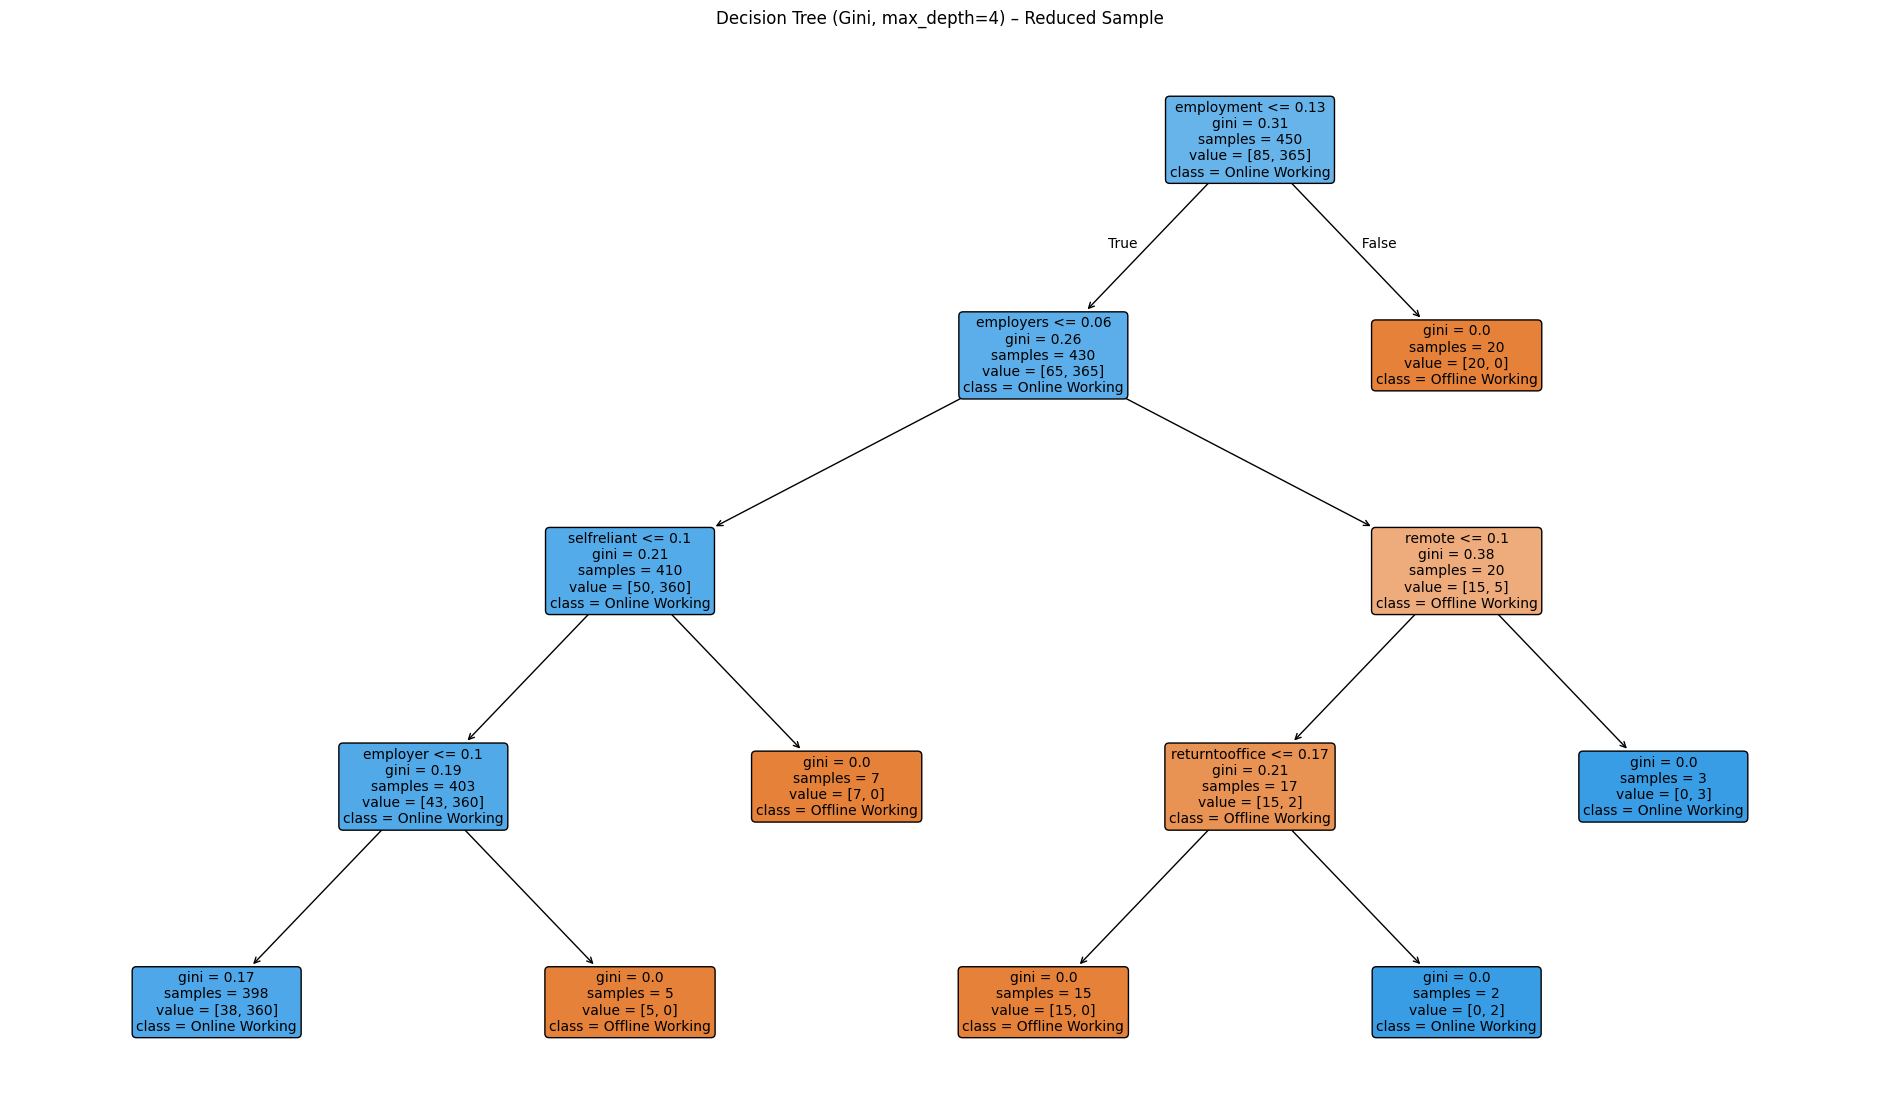

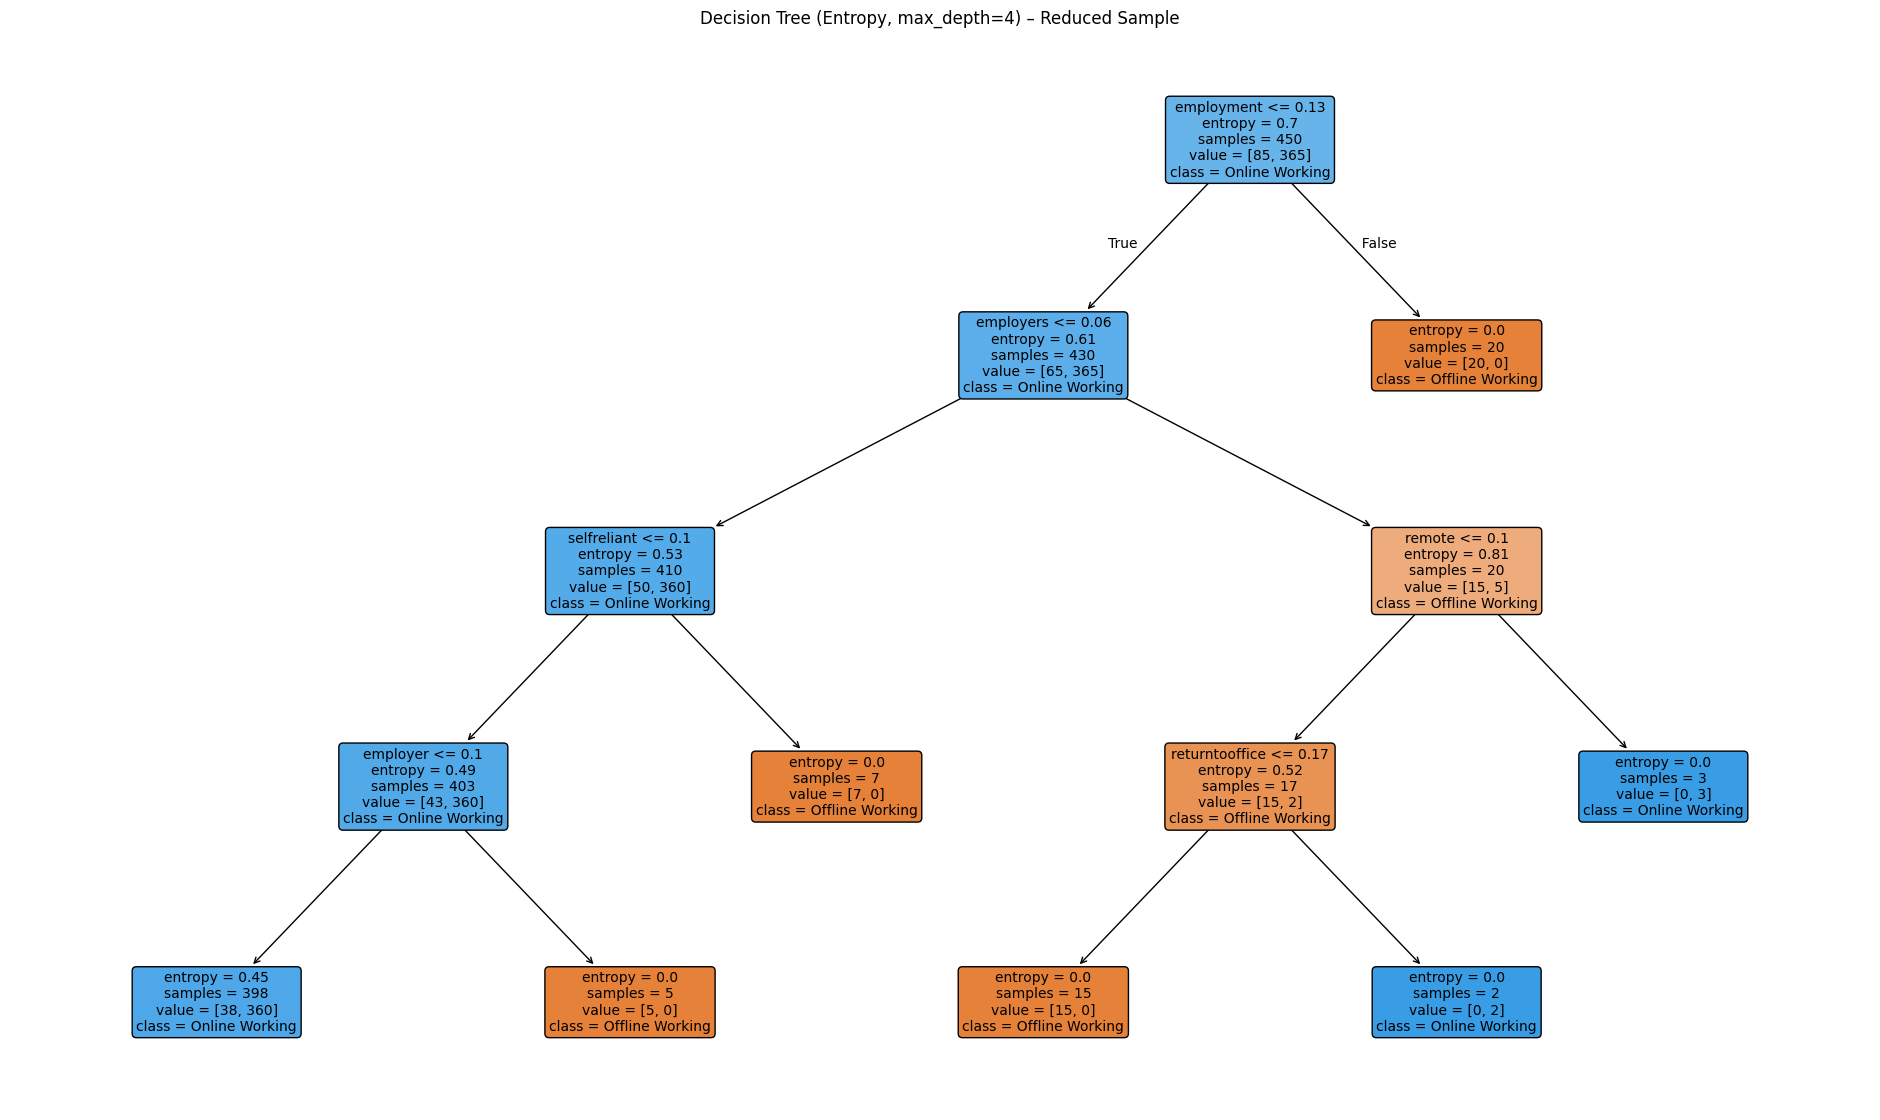

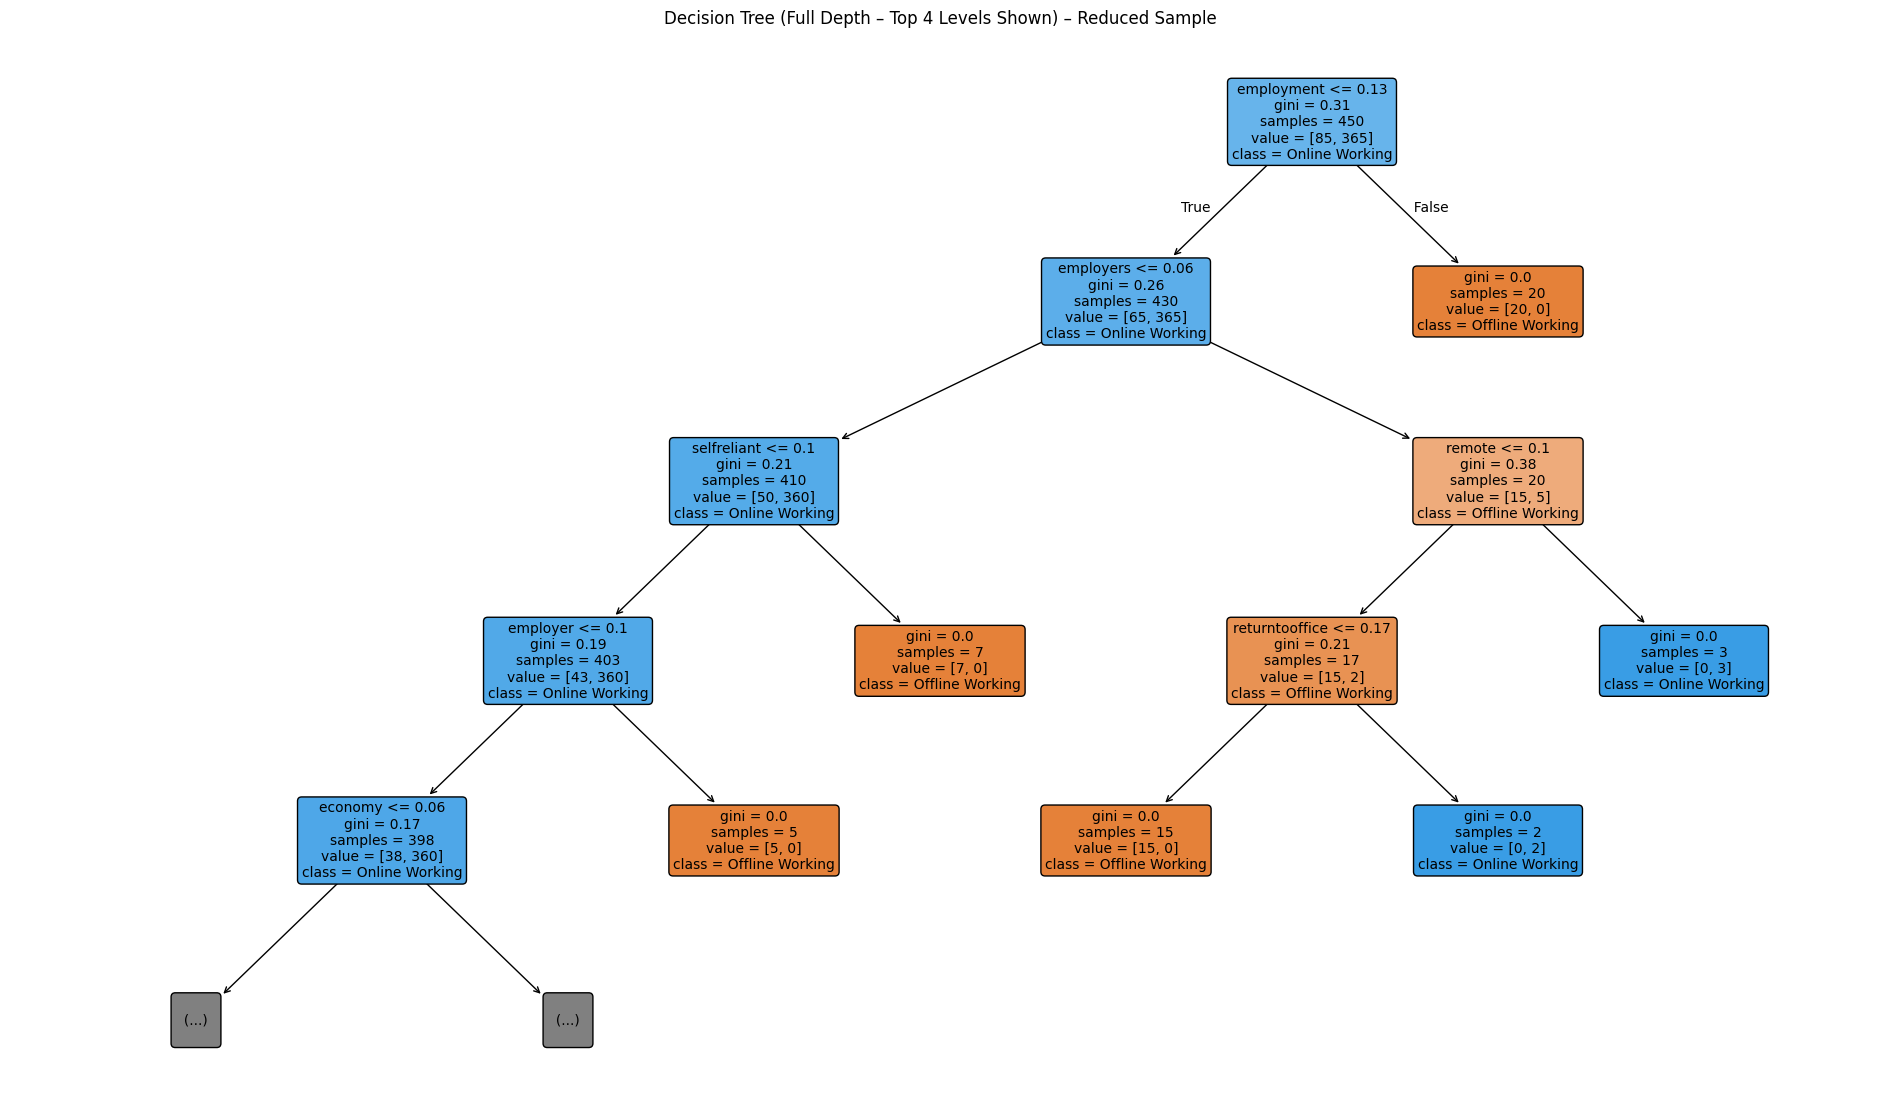

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/tfidf_features_with_labels.csv")
X = df.drop(columns=["label"])
y = df["label"]
label_encoder = LabelEncoder()
label_encoder.fit(["Offline Working", "Online Working"])

X_small = X.head(600)
y_small = y[:600]

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_small, y_small, test_size=0.25, random_state=42, stratify=y_small
)

dt_small_gini = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
dt_small_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
dt_small_full = DecisionTreeClassifier(criterion="gini", random_state=42)  # Full tree

dt_small_gini.fit(X_train_small, y_train_small)
dt_small_entropy.fit(X_train_small, y_train_small)
dt_small_full.fit(X_train_small, y_train_small)
#gini index
plt.figure(figsize=(24, 14))
plot_tree(dt_small_gini,
          feature_names=X.columns.tolist(),
          class_names=["Offline Working", "Online Working"],
          filled=True, rounded=True, precision=2, fontsize=10)
plt.title("Decision Tree (Gini, max_depth=4) – Reduced Sample")
plt.show()

#Entropy Tree
plt.figure(figsize=(24, 14))
plot_tree(dt_small_entropy,
          feature_names=X.columns.tolist(),
          class_names=["Offline Working", "Online Working"],
          filled=True, rounded=True, precision=2, fontsize=10)
plt.title("Decision Tree (Entropy, max_depth=4) – Reduced Sample")
plt.show()

# Full Tree
plt.figure(figsize=(24, 14))
plot_tree(dt_small_full,
          feature_names=X.columns.tolist(),
          class_names=["Offline Working", "Online Working"],
          filled=True, rounded=True, precision=2, fontsize=10,
          max_depth=4)
plt.title("Decision Tree (Full Depth – Top 4 Levels Shown) – Reduced Sample")
plt.show()


Gini Tree Accuracy: 0.88


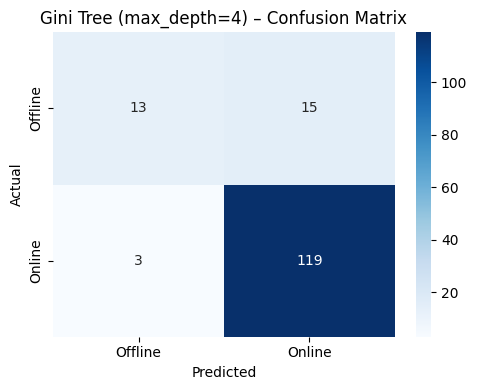

Entropy Tree Accuracy: 0.88


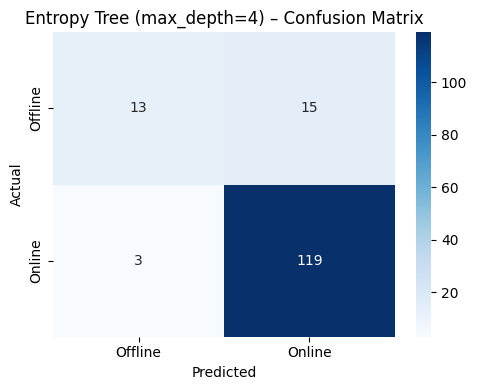

Full Tree Accuracy: 0.84


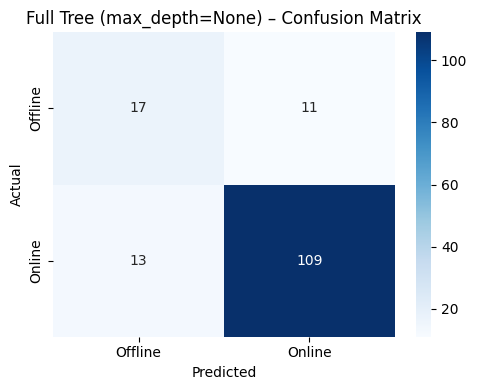

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Offline", "Online"], yticklabels=["Offline", "Online"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Gini Tree
y_pred_gini = dt_small_gini.predict(X_test_small)
print("Gini Tree Accuracy:", accuracy_score(y_test_small, y_pred_gini))
plot_conf_matrix(y_test_small, y_pred_gini, "Gini Tree (max_depth=4) – Confusion Matrix")

# Entropy Tree
y_pred_entropy = dt_small_entropy.predict(X_test_small)
print("Entropy Tree Accuracy:", accuracy_score(y_test_small, y_pred_entropy))
plot_conf_matrix(y_test_small, y_pred_entropy, "Entropy Tree (max_depth=4) – Confusion Matrix")

# Full Tree
y_pred_full = dt_small_full.predict(X_test_small)
print("Full Tree Accuracy:", accuracy_score(y_test_small, y_pred_full))
plot_conf_matrix(y_test_small, y_pred_full, "Full Tree (max_depth=None) – Confusion Matrix")


##**SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/tfidf_features_with_labels.csv")

print("Sample data:")
print(df.sample(5))

X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")


Sample data:
      abc  ability  able  abrir  abroad  accept  access  accessible  \
1977  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2128  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
2537  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
114   0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   
1489  0.0      0.0   0.0    0.0     0.0     0.0     0.0         0.0   

      according  account  ...  york  youll  young  younger  youre  youth  \
1977        0.0      0.0  ...   0.0    0.0    0.0      0.0    0.0    0.0   
2128        0.0      0.0  ...   0.0    0.0    0.0      0.0    0.0    0.0   
2537        0.0      0.0  ...   0.0    0.0    0.0      0.0    0.0    0.0   
114         0.0      0.0  ...   0.0    0.0    0.0      0.0    0.0    0.0   
1489        0.0      0.0  ...   0.0    0.0    0.0      0.0    0.0    0.0   

      youtube  youve  zealand  label  
1977      0.0    0.0      0.0      0  
2128      0.0    0.0     


Training SVM with kernel='linear', C=0.1
Accuracy: 0.5256637168141592
              precision    recall  f1-score   support

     Offline       0.00      0.00      0.00       268
      Online       0.53      1.00      0.69       297

    accuracy                           0.53       565
   macro avg       0.26      0.50      0.34       565
weighted avg       0.28      0.53      0.36       565



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


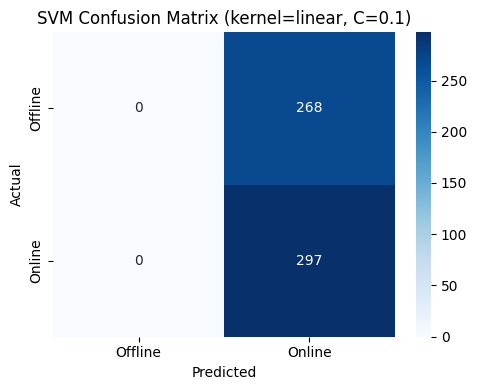


Training SVM with kernel='linear', C=1
Accuracy: 0.5876106194690266
              precision    recall  f1-score   support

     Offline       0.57      0.56      0.56       268
      Online       0.61      0.62      0.61       297

    accuracy                           0.59       565
   macro avg       0.59      0.59      0.59       565
weighted avg       0.59      0.59      0.59       565



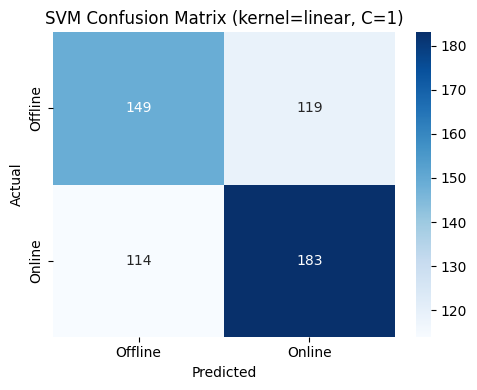


Training SVM with kernel='linear', C=10
Accuracy: 0.5575221238938053
              precision    recall  f1-score   support

     Offline       0.53      0.53      0.53       268
      Online       0.58      0.59      0.58       297

    accuracy                           0.56       565
   macro avg       0.56      0.56      0.56       565
weighted avg       0.56      0.56      0.56       565



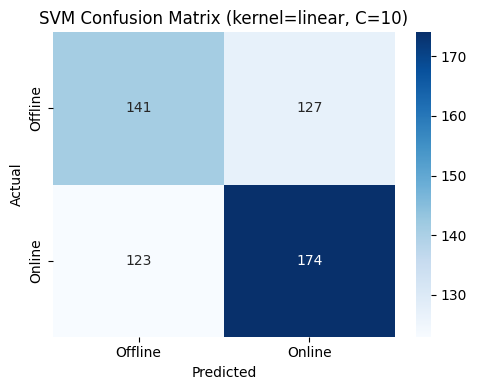


Training SVM with kernel='rbf', C=0.1
Accuracy: 0.5256637168141592
              precision    recall  f1-score   support

     Offline       0.00      0.00      0.00       268
      Online       0.53      1.00      0.69       297

    accuracy                           0.53       565
   macro avg       0.26      0.50      0.34       565
weighted avg       0.28      0.53      0.36       565



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


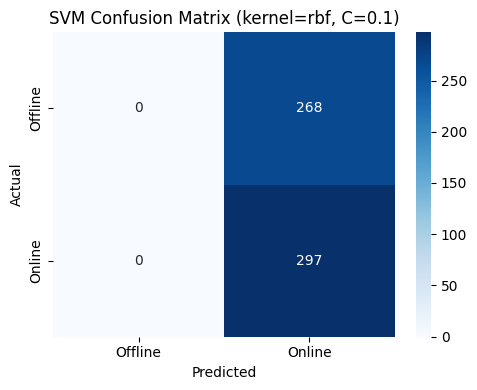


Training SVM with kernel='rbf', C=1
Accuracy: 0.6088495575221239
              precision    recall  f1-score   support

     Offline       0.60      0.53      0.56       268
      Online       0.62      0.68      0.65       297

    accuracy                           0.61       565
   macro avg       0.61      0.61      0.60       565
weighted avg       0.61      0.61      0.61       565



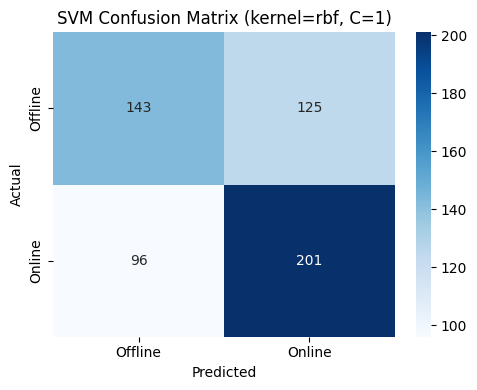


Training SVM with kernel='rbf', C=10
Accuracy: 0.5946902654867257
              precision    recall  f1-score   support

     Offline       0.58      0.54      0.56       268
      Online       0.61      0.64      0.62       297

    accuracy                           0.59       565
   macro avg       0.59      0.59      0.59       565
weighted avg       0.59      0.59      0.59       565



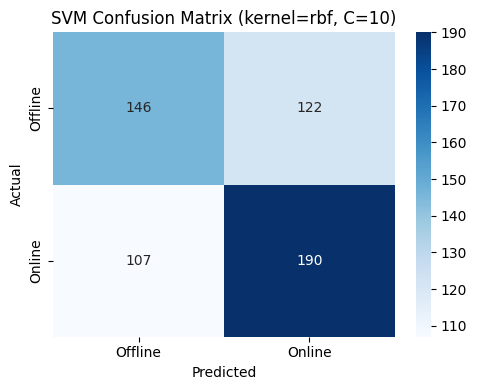


Training SVM with kernel='poly', C=0.1
Accuracy: 0.5256637168141592
              precision    recall  f1-score   support

     Offline       0.00      0.00      0.00       268
      Online       0.53      1.00      0.69       297

    accuracy                           0.53       565
   macro avg       0.26      0.50      0.34       565
weighted avg       0.28      0.53      0.36       565



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


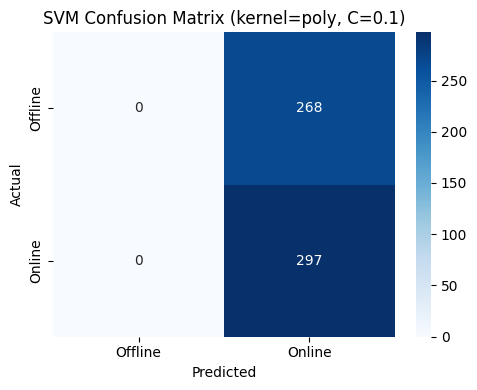


Training SVM with kernel='poly', C=1
Accuracy: 0.5769911504424778
              precision    recall  f1-score   support

     Offline       0.66      0.22      0.33       268
      Online       0.56      0.90      0.69       297

    accuracy                           0.58       565
   macro avg       0.61      0.56      0.51       565
weighted avg       0.61      0.58      0.52       565



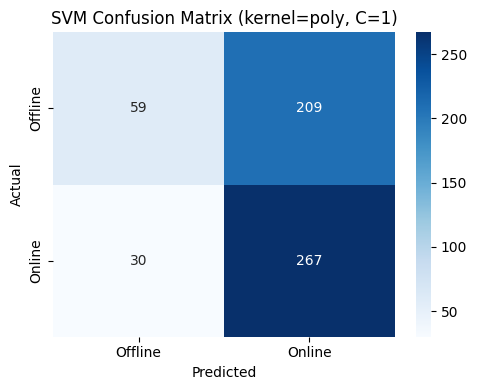


Training SVM with kernel='poly', C=10
Accuracy: 0.5699115044247788
              precision    recall  f1-score   support

     Offline       0.63      0.23      0.33       268
      Online       0.56      0.88      0.68       297

    accuracy                           0.57       565
   macro avg       0.59      0.55      0.51       565
weighted avg       0.59      0.57      0.52       565



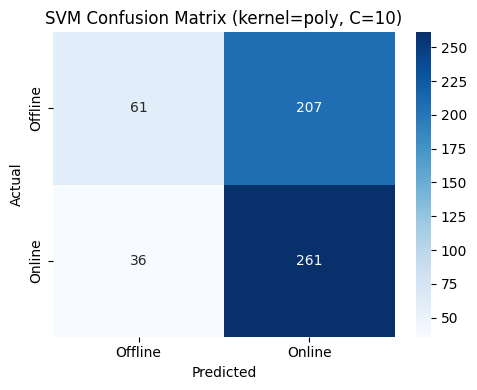

In [ ]:
kernels = ["linear", "rbf", "poly"]
costs = [0.1, 1, 10]

results = []

for kernel in kernels:
    for c in costs:
        print(f"\nTraining SVM with kernel='{kernel}', C={c}")
        model = SVC(kernel=kernel, C=c, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print("Accuracy:", acc)
        print(classification_report(y_test, y_pred, target_names=["Offline", "Online"]))

        results.append({
            "kernel": kernel,
            "C": c,
            "accuracy": acc,
            "confusion_matrix": cm
        })

        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=["Offline", "Online"], yticklabels=["Offline", "Online"])
        plt.title(f"SVM Confusion Matrix (kernel={kernel}, C={c})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()



SVM Kernel Comparison:
   kernel     C  accuracy
4     rbf   1.0  0.608850
5     rbf  10.0  0.594690
1  linear   1.0  0.587611
7    poly   1.0  0.576991
8    poly  10.0  0.569912
2  linear  10.0  0.557522
0  linear   0.1  0.525664
3     rbf   0.1  0.525664
6    poly   0.1  0.525664


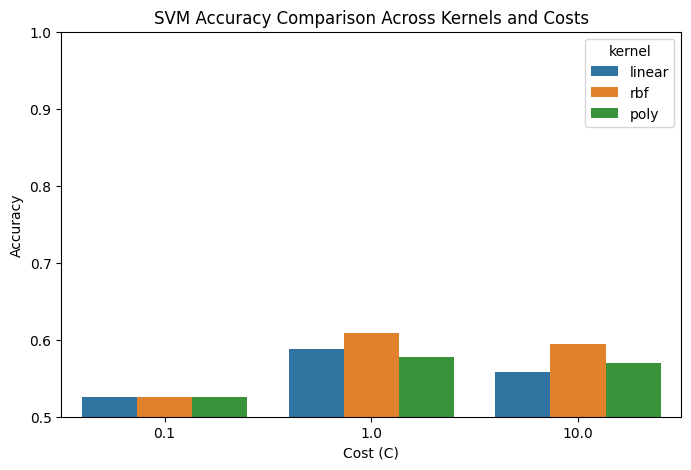

In [ ]:
summary = pd.DataFrame(results)[["kernel", "C", "accuracy"]]
print("\nSVM Kernel Comparison:")
print(summary.sort_values(by="accuracy", ascending=False))

plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x="C", y="accuracy", hue="kernel")
plt.title("SVM Accuracy Comparison Across Kernels and Costs")
plt.ylabel("Accuracy")
plt.xlabel("Cost (C)")
plt.ylim(0.5, 1)
plt.show()


##**Neural Nets**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv("/content/all_data_text_mining.csv")
df = df[["excerpt", "view_label"]].dropna()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df["cleaned_excerpt"] = df["excerpt"].astype(str).apply(clean_text)
df = df[df["cleaned_excerpt"].str.strip() != ""]

# Encode labels: Online Working = 1, Offline Working = 0
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["view_label"])

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["cleaned_excerpt"])
sequences = tokenizer.texts_to_sequences(df["cleaned_excerpt"])

padded = pad_sequences(sequences, maxlen=200, padding='post')
X = padded
y = df["label"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Sample cleaned text:\n", df["cleaned_excerpt"].sample(5).values)
print("X_train shape:", X_train.shape)
print("y_train value counts:\n", pd.Series(y_train).value_counts())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Sample cleaned text:
 ['former exec company known antagonism labor rights may head agency tasked protecting americas workers'
 'deal rationalism cults'
 'federal reserves monetary policy decisions significantly influence way cd interest rates move'
 'readiness imprtance expertise'
 'canadas first accessibility commissioner resigned legal battle federal government involving external investigation allegations mistreated staff']
X_train shape: (2257, 200)
y_train value counts:
 1    1186
0    1071
Name: count, dtype: int64


<ipython-input-1-0ecd932c3155>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = label_encoder.fit_transform(df["view_label"])


In [ ]:
df

excerpt       view_label  \
0     Remote work has become an integral part of the...   Online Working   
1     New research shows that 30% of Gen Z workers w...   Online Working   
2     First-ever global ranking for Allianz Group pl...   Online Working   
3     Swiggy leverages technology and flexible worki...   Online Working   
4     JP Morgan has ordered all London staff back to...   Online Working   
...                                                 ...              ...   
2820  The White House is taking a critical step to e...  Offline Working   
2821  Silicon Valley is reeling. However, founder Li...  Offline Working   
2822  The retailer is asking some of its employees t...  Offline Working   
2823  Former federal health official Gerald Parker i...  Offline Working   
2824  President Donald Trump signed two executive or...  Offline Working   

                                        cleaned_excerpt  label  
0     remote work become integral part modern busine...      1  
1     new research shows gen z workers signed mental...      1  
2     firstever global ranking allianz group places ...      1  
3     swiggy leverages technology flexible working c...      1  
4     jp morgan ordered london staff back officebut ...      1  
...                                                 ...    ...  
2820  white house taking critical step ensure obstru...      0  
2821  silicon valley reeling however founder liang w...      0  
2822  retailer asking employees relocate offices ark...      0  
2823  former federal health official gerald parker t...      0  
2824  president donald trump signed two executive or...      0  

[2822 rows x 4 columns]

In [ ]:
import pandas as pd

df_train = pd.DataFrame(X_train)
df_train['label'] = y_train
df_test = pd.DataFrame(X_test)
df_test['label'] = y_test

df_train.head()




0    1     2     3     4     5     6     7     8     9  ...  191  192  \
0   187  628   446  2438  1679   574     1     1   226  1211  ...    0    0   
1   409  243  1339   923   375    59   119  1648     0     0  ...    0    0   
2  3358    2   921   602  1100     1   924   185  1653    63  ...    0    0   
3     1    1    32  3171   104    11     0     0     0     0  ...    0    0   
4     1    1  1949  4845     2  4846  2671  1430   774     1  ...    0    0   

   193  194  195  196  197  198  199  label  
0    0    0    0    0    0    0    0      1  
1    0    0    0    0    0    0    0      0  
2    0    0    0    0    0    0    0      1  
3    0    0    0    0    0    0    0      0  
4    0    0    0    0    0    0    0      1  

[5 rows x 201 columns]

In [ ]:
df_test.head()

0     1     2     3     4     5     6    7     8     9  ...  191  192  \
0  1469     1  2213  1323   496     1  3053    1   492   760  ...    0    0   
1   721     0     0     0     0     0     0    0     0     0  ...    0    0   
2   142  2798   288  1134  1357   193   493  328   142   682  ...    0    0   
3     2    82  1078     1  1176   649  1083  354   711  4907  ...    0    0   
4   509   534  4814  1510    81  2686  1126    1  1550  1510  ...    0    0   

   193  194  195  196  197  198  199  label  
0    0    0    0    0    0    0    0      0  
1    0    0    0    0    0    0    0      1  
2    0    0    0    0    0    0    0      0  
3    0    0    0    0    0    0    0      1  
4    0    0    0    0    0    0    0      1  

[5 rows x 201 columns]

LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.5482 - loss: 0.6908 - val_accuracy: 0.5973 - val_loss: 0.6738
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.7155 - loss: 0.5801 - val_accuracy: 0.6239 - val_loss: 0.6533
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.9156 - loss: 0.2364 - val_accuracy: 0.5929 - val_loss: 0.7838
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.9726 - loss: 0.1067 - val_accuracy: 0.6327 - val_loss: 1.2086
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.9913 - loss: 0.0361 - val_accuracy: 0.6504 - val_loss: 1.5997
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       268
           1       0.59      0.59      0.59       297

    accuracy                           0.57       565
   macro avg       0.57      0.57      0.57       565
weighted avg       0

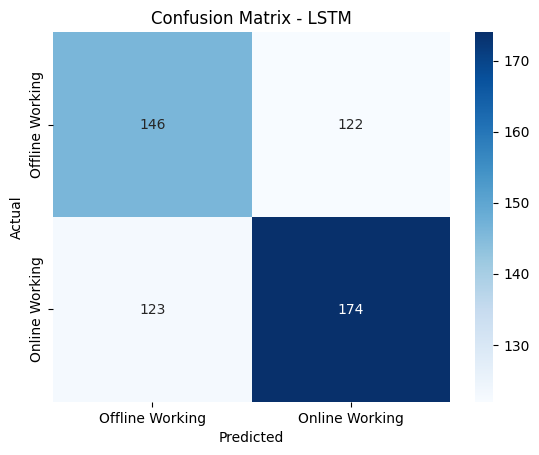

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, SimpleRNN
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()
history_lstm = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

cm_lstm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SIMPLE RNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.5308 - loss: 0.6902 - val_accuracy: 0.5310 - val_loss: 0.6965
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5054 - loss: 0.6935 - val_accuracy: 0.5442 - val_loss: 0.7188
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5319 - loss: 0.6947 - val_accuracy: 0.5442 - val_loss: 0.6814
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5186 - loss: 0.6995 - val_accuracy: 0.6062 - val_loss: 0.6719
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.4951 - loss: 0.7065 - val_accuracy: 0.4513 - val_loss: 0.6962
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
 Simple RNN Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.73      0.60       268
           1       0.59      0.36      0.45       297

    accuracy                           0.53       565
   macro avg       0.55      0.54      0.52       565
weighted avg       0.55

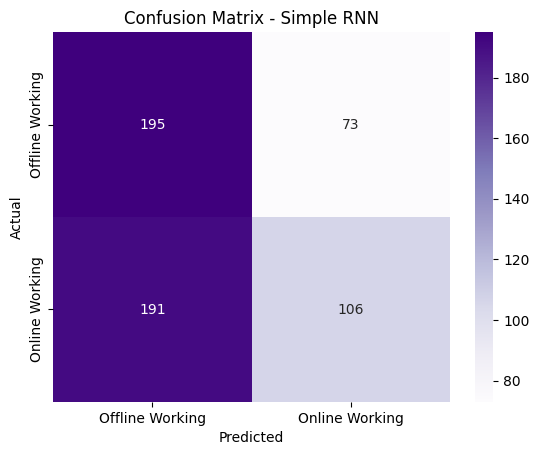

In [ ]:
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    SimpleRNN(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.summary()

# Train RNN model
history_rnn = rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate RNN
y_pred_rnn = (rnn_model.predict(X_test) > 0.5).astype("int32")

print(" Simple RNN Classification Report:")
print(classification_report(y_test, y_pred_rnn))

cm_rnn = confusion_matrix(y_test, y_pred_rnn)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Purples', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Simple RNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


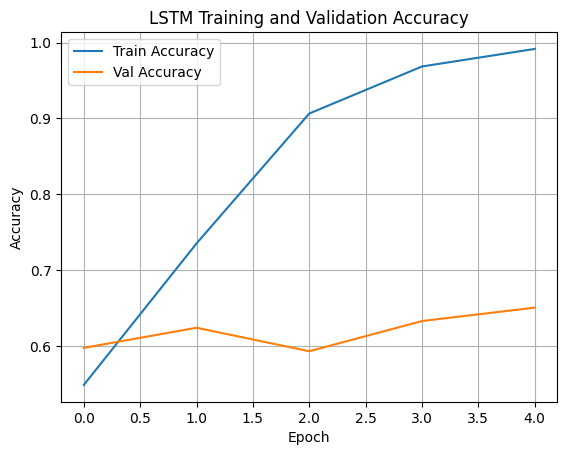

In [ ]:
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.title("LSTM Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
